## My song conventions
Silent = 0, sine = 1, pulse_slow = 2, pulse_fast = 3

Note: melanogaster interpulse interval ~ 35 ms

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

from aux import loadmat_h5
from disp import set_plot

cc = np.concatenate

DATA_DIR = 'data/original/wt_gold/wt'
FPS = 150
DT = 1/FPS

MIN_GAP = int(np.round(.075/DT))

MAX_EXPTS = None

In [2]:
expts = []
for x in os.listdir(DATA_DIR):
    if x.endswith('.h5') and not(x.startswith('testing')):
        expts.append(x)
expts = sorted(expts)
print(f'All experiments (n = {len(expts)}):')
[print(f'{cexpt}: {expt}') for cexpt, expt in enumerate(expts)];

All experiments (n = 84):
0: 190612_110405_wt_16276625_rig2.1.h5
1: 190612_110405_wt_18159111_rig2.2.h5
2: 190612_110639_wt_18159211_rig1.1.h5
3: 190612_110953_wt_18159112_rig3.2.h5
4: 190612_110953_wt_18159203_rig3.1.h5
5: 190613_095814_wt_16276625_rig2.1.h5
6: 190613_100053_wt_18159206_rig1.2.h5
7: 190619_103019_wt_18159111_rig2.2.h5
8: 190619_103446_wt_18159206_rig1.2.h5
9: 190619_103820_wt_18159112_rig3.2.h5
10: 190718_104807_wt_18159112_rig3.2.h5
11: 190718_104807_wt_18159203_rig3.1.h5
12: 190718_110328_wt_18159203_rig3.1.h5
13: 190719_085355_wt_18159112_rig3.2.h5
14: 190719_085355_wt_18159203_rig3.1.h5
15: 190719_085631_wt_16276625_rig2.1.h5
16: 190719_090330_wt_18159206_rig1.2.h5
17: 190719_091945_wt_18159206_rig1.2.h5
18: 190719_093704_wt_16276625_rig2.1.h5
19: 190719_094414_wt_18159112_rig3.2.h5
20: 190723_102650_wt_18159206_rig1.2.h5
21: 190723_102650_wt_18159211_rig1.1.h5
22: 190723_103019_wt_16276625_rig2.1.h5
23: 190723_103019_wt_18159111_rig2.2.h5
24: 190724_103424_wt_181

# Basic data parameters

In [3]:
FPS = 150  # Hz (property of data, don't change)
DT = 1/FPS  # sec

# Load trials

In [4]:
EXPT_ID = 0
ds = []
for expt_id in range(84):
    d = loadmat_h5(os.path.join(DATA_DIR, expts[expt_id]))
    n_t = len(d['fFV'])

    d['sine_lims_150'] = d['frame_at_sample'][d['sine_lims'].astype(int)].astype(int)  # sine limits at 150 fps
    d['pslow_lims_150'] = d['frame_at_sample'][d['pslow_lims'].astype(int)].astype(int)  # pslow limits at 150 fps
    d['pfast_lims_150'] = d['frame_at_sample'][d['pfast_lims'].astype(int)].astype(int)  # pfast limits at 150 fps

    if not ((d['sine_lims_150'].size == 0) and (d['pslow_lims_150'].size == 0) and (d['pfast_lims_150'].size == 0)):
        sys.stdout.write('-')
        assert np.max(cc([d['sine_lims_150'], d['pslow_lims_150'], d['pfast_lims_150']], axis=1)) <= n_t
    else:
        sys.stdout.write('x')

    s = np.zeros(len(d['mFV']), dtype=int)  # song
    for istart, iend in d['sine_lims_150'].T:
        s[istart:iend] = 1

    for istart, iend in d['pslow_lims_150'].T:
        s[istart:iend] = 2

    for istart, iend in d['pfast_lims_150'].T:
        s[istart:iend] = 3

    d['t'] = np.arange(n_t)*DT
    d['s'] = s
    
    ds.append(d)

-----------------------------------------------------------------------------x------

In [5]:
print(d.keys())

dict_keys(['arcThetaL', 'arcThetaR', 'audio', 'egoF', 'egoFrM', 'egoM', 'egoMrF', 'expt_folder', 'expt_name', 'fFA', 'fFV', 'fLA', 'fLS', 'fLV', 'fRS', 'fmAng', 'fmFV', 'fmLS', 'frame_at_sample', 'mFA', 'mFV', 'mLA', 'mLS', 'mLV', 'mRS', 'mfAng', 'mfDist', 'mfFV', 'mfLS', 'mix_bouts', 'node_names', 'pfast_lims', 'pslow_lims', 'pulse_bouts', 'sample_at_frame', 'sine_bouts', 'sine_lims', 'trxF', 'trxM', 'wingFL', 'wingFR', 'wingML', 'wingMR', 'sine_lims_150', 'pslow_lims_150', 'pfast_lims_150', 't', 's'])


In [6]:
import matplotlib.gridspec as gridspec
from scipy.signal import correlate
from scipy.ndimage import gaussian_filter1d as smooth
from time_stats import xcov_with_confidence

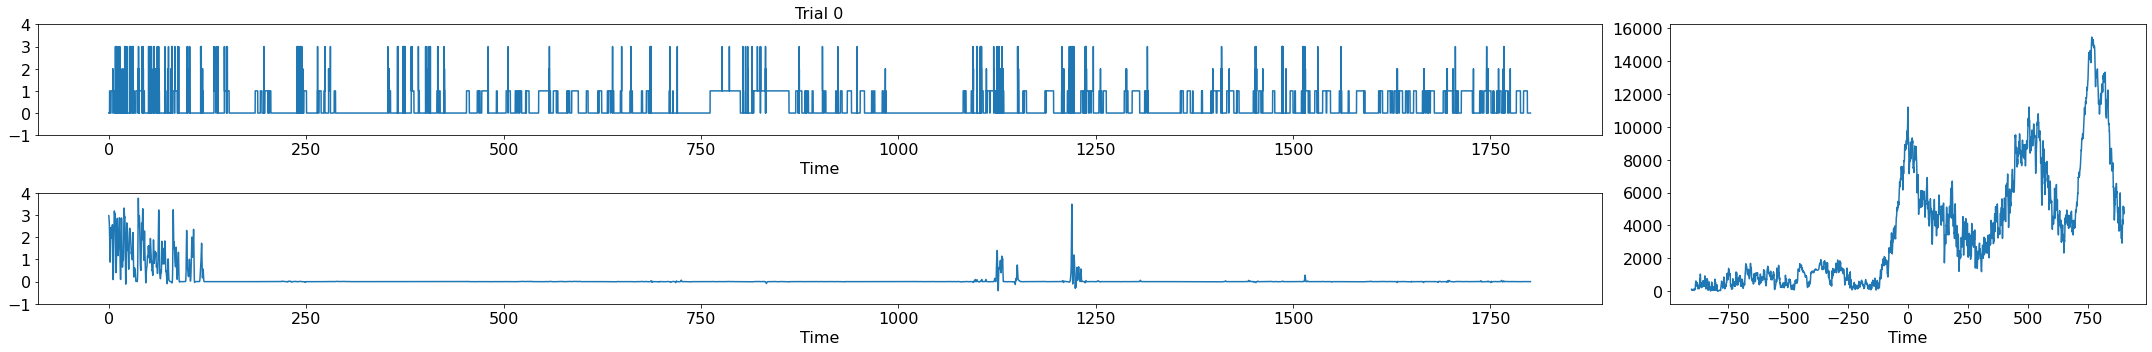

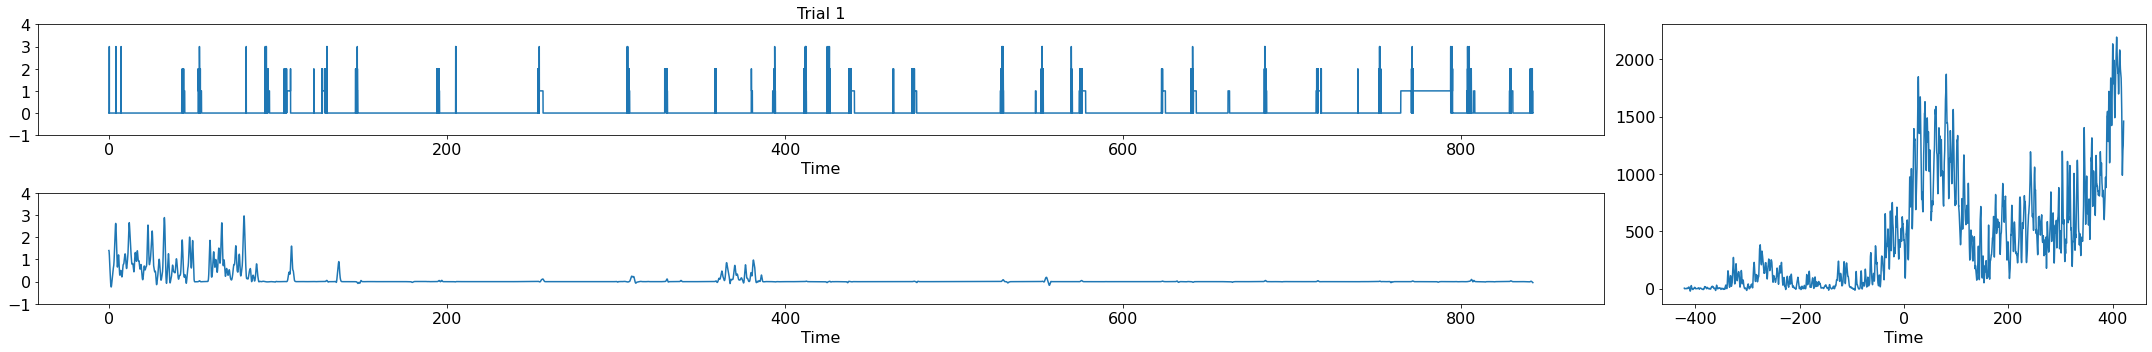

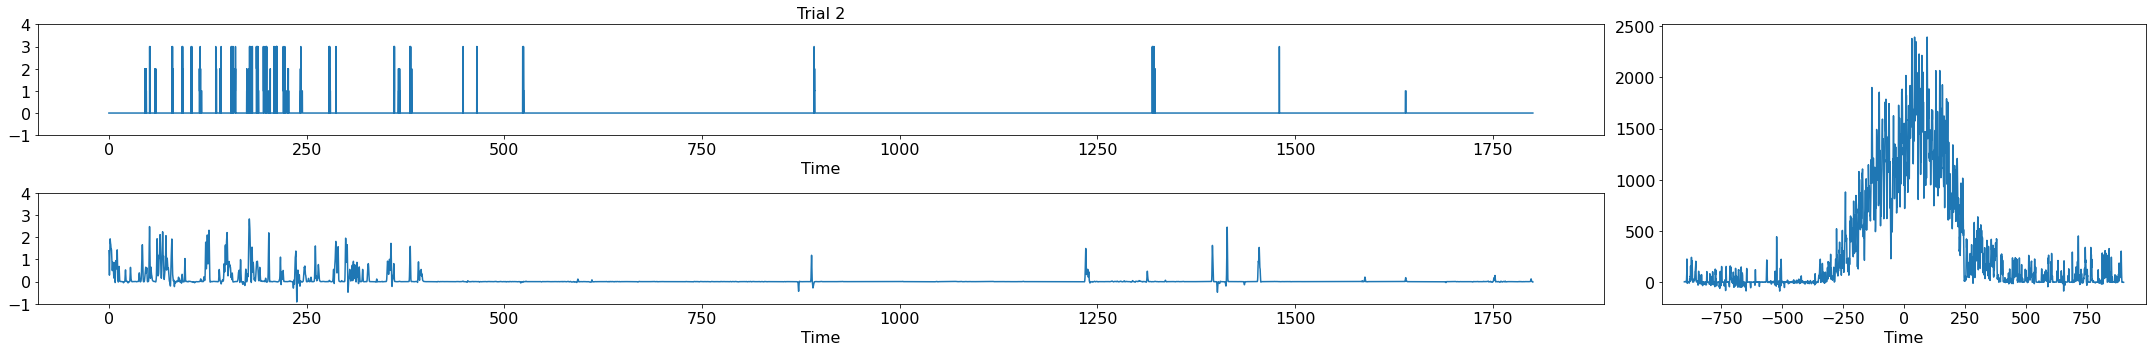

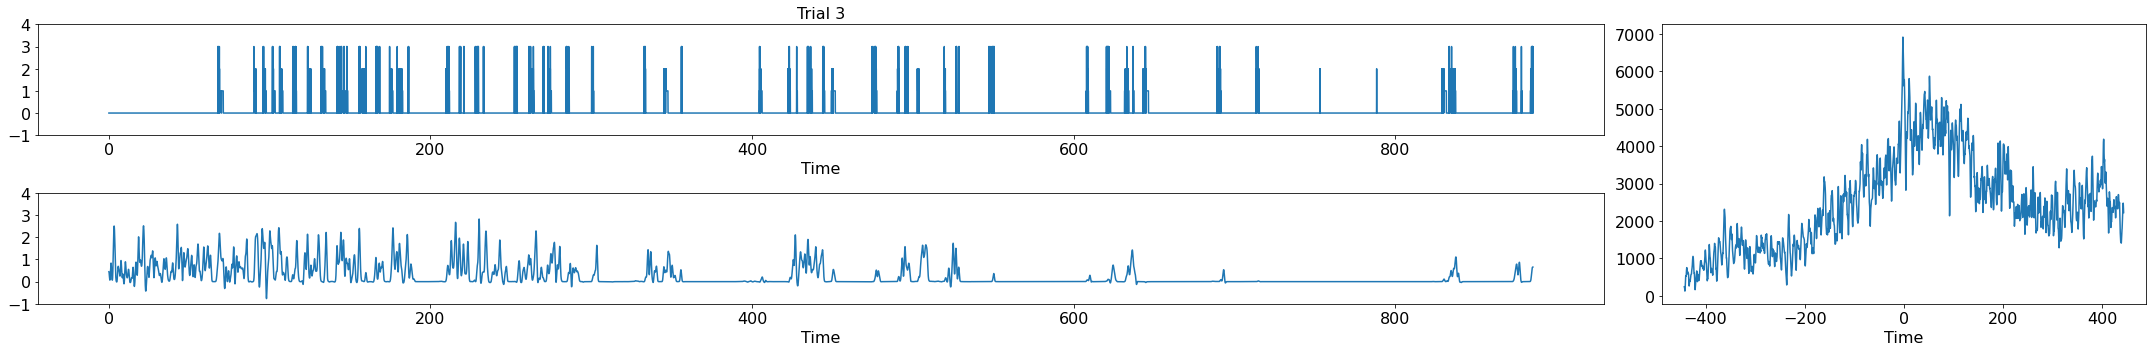

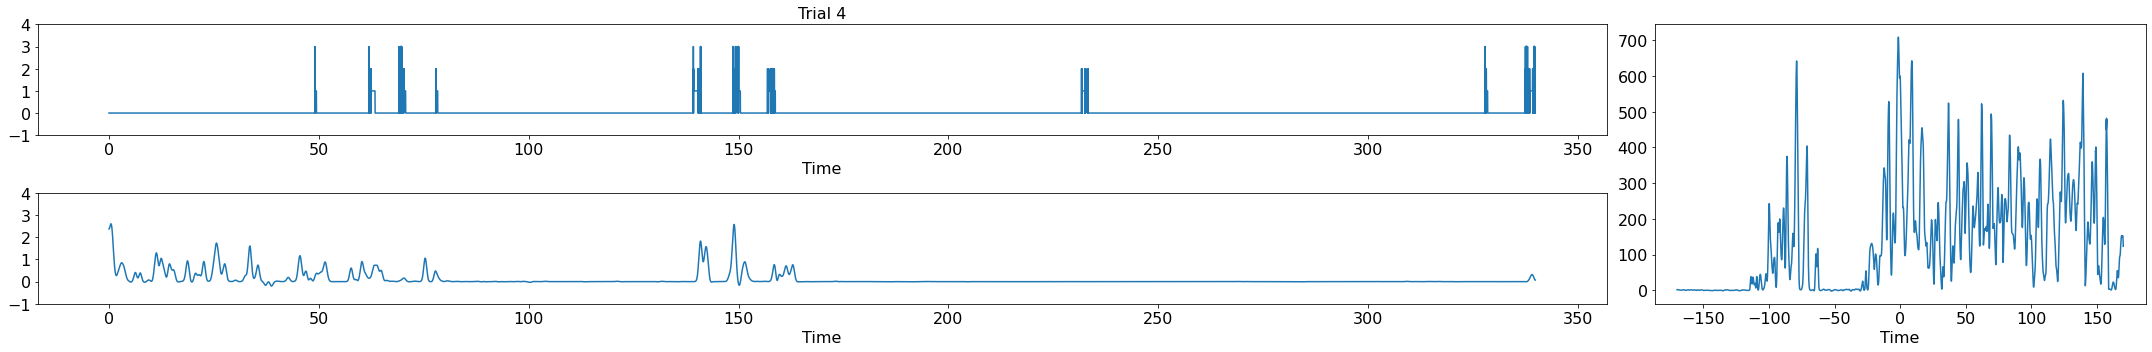

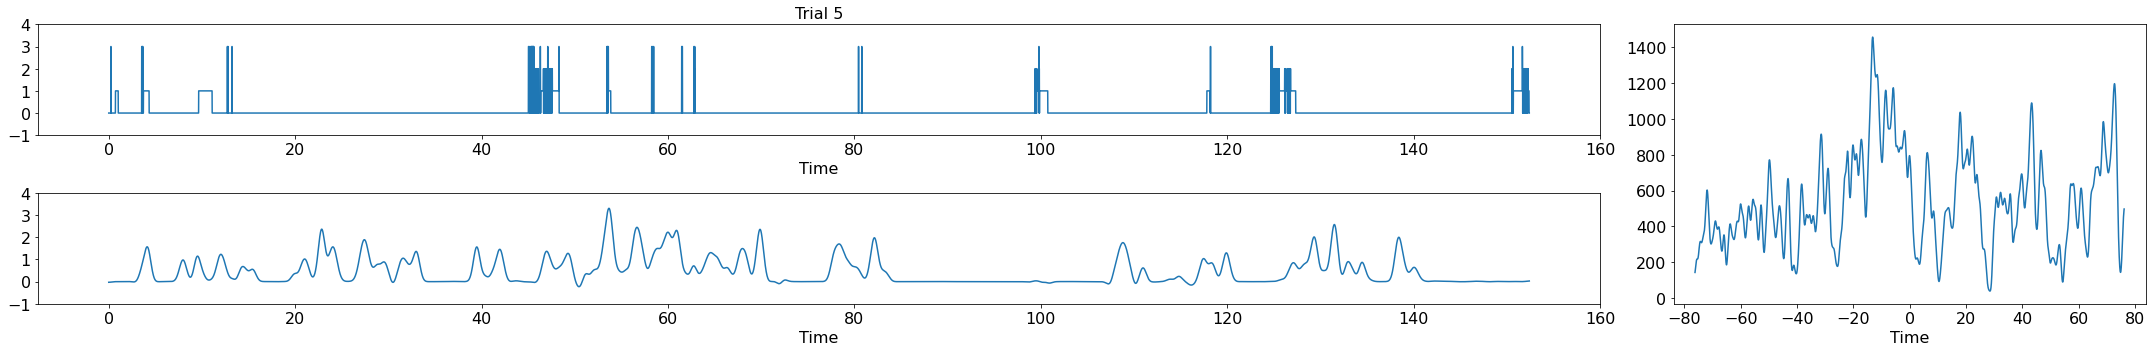

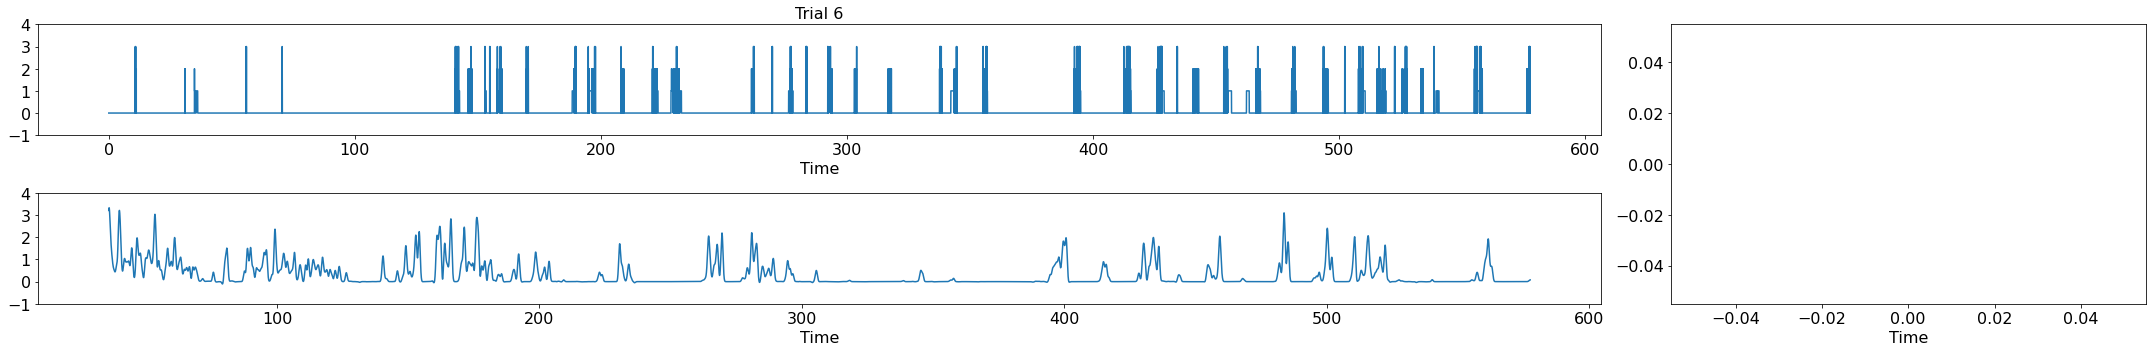

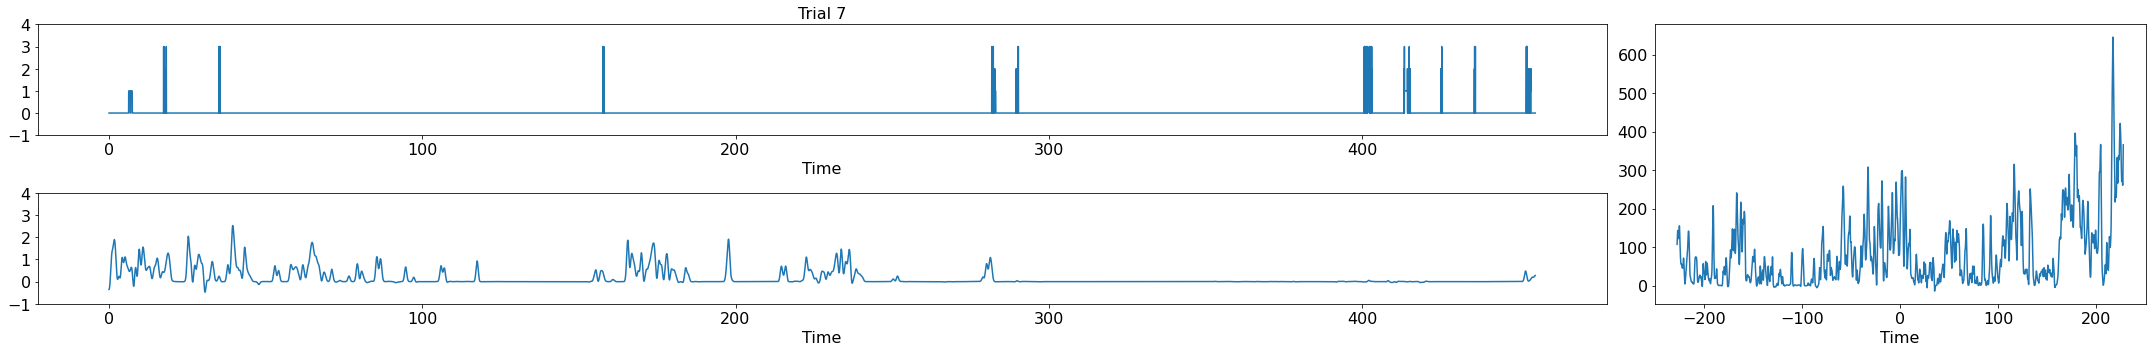

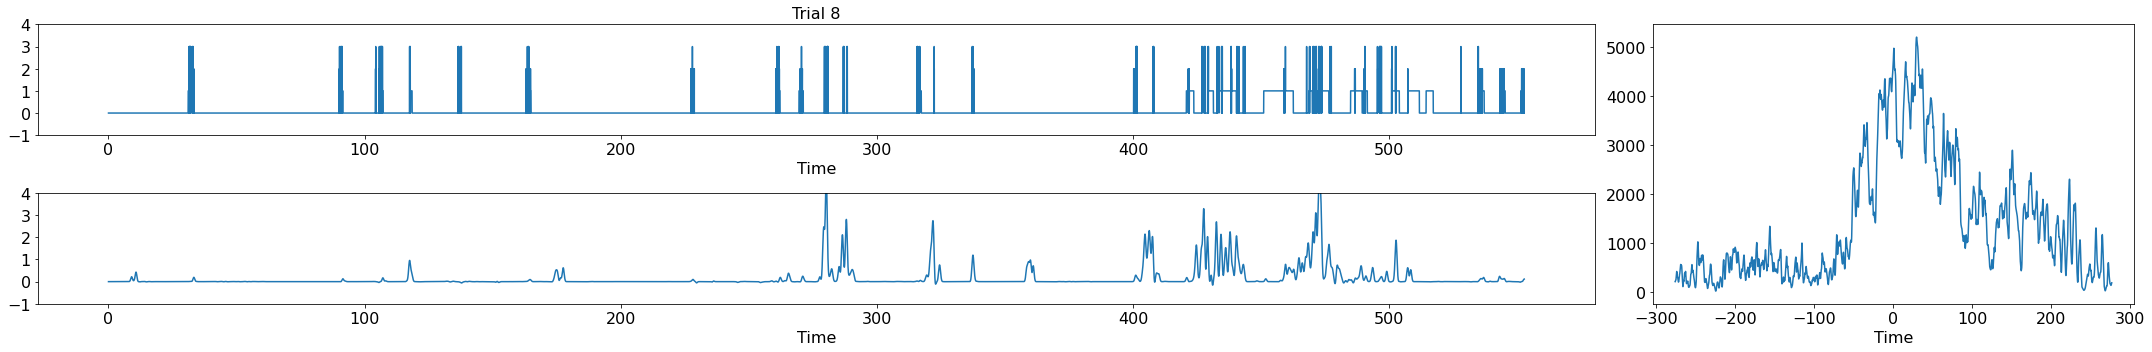

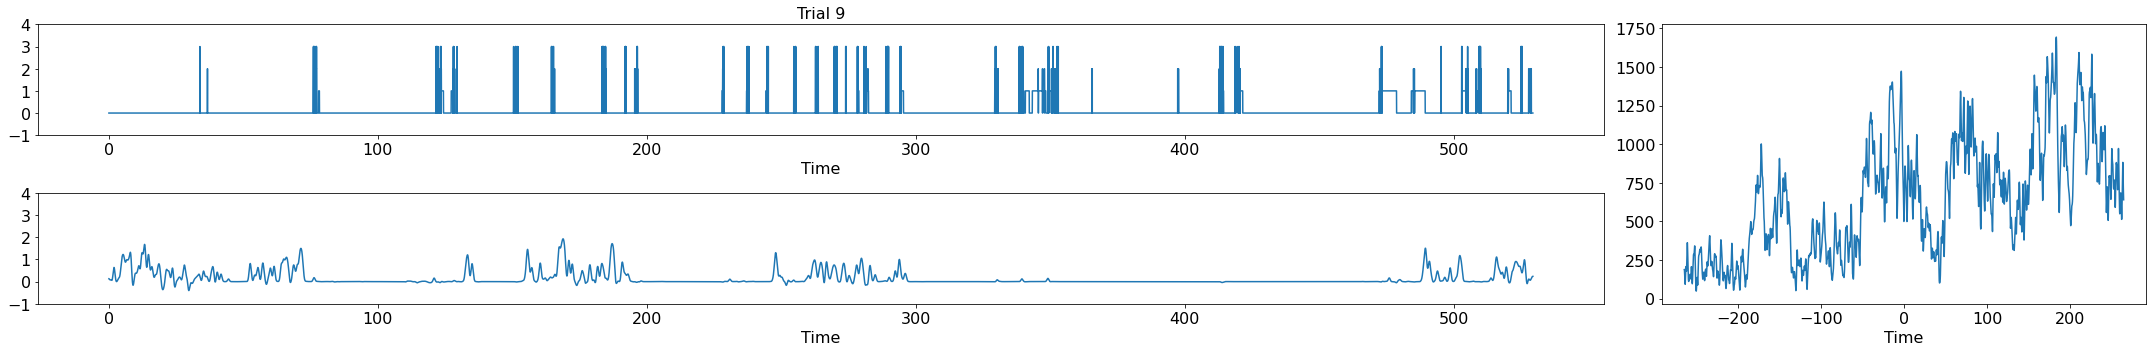

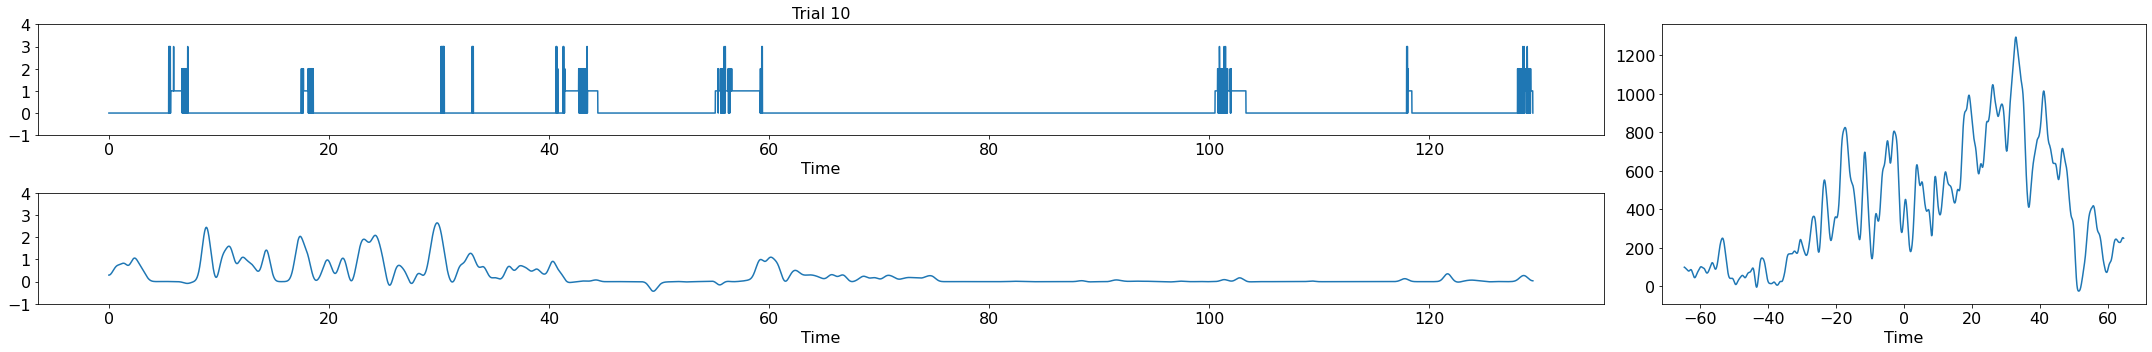

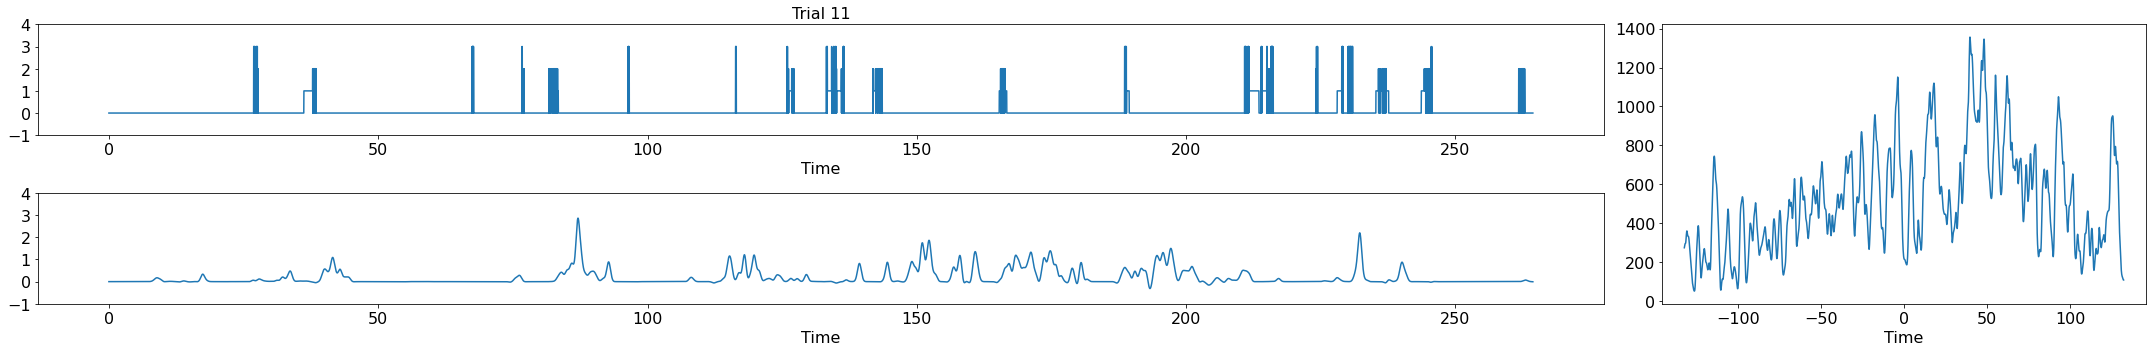

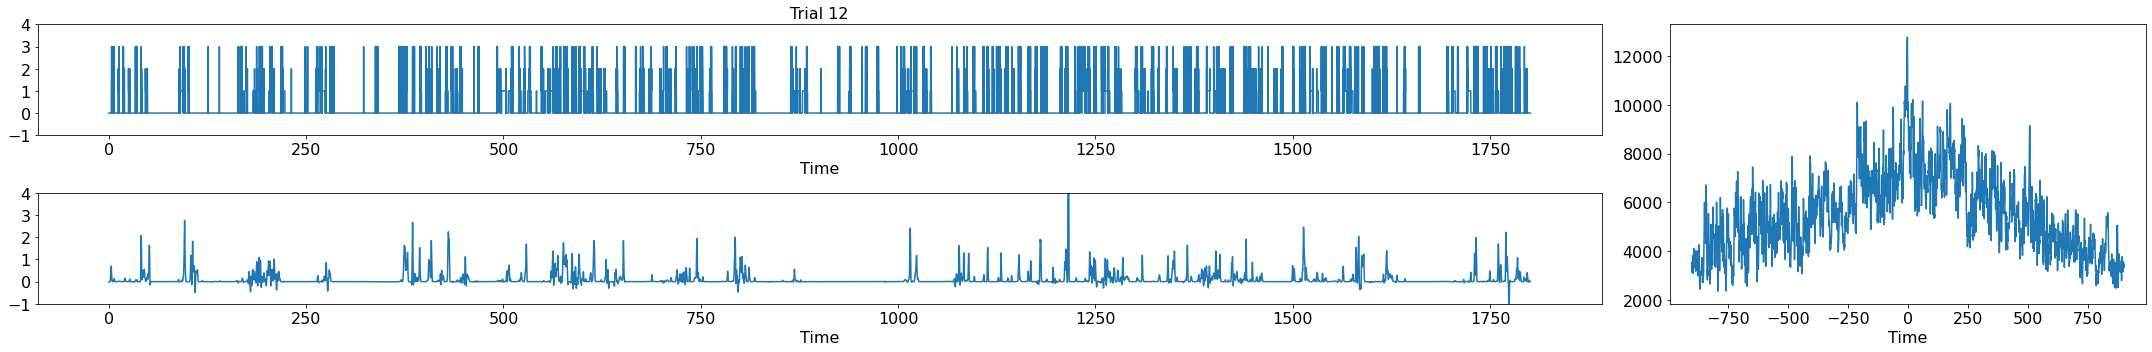

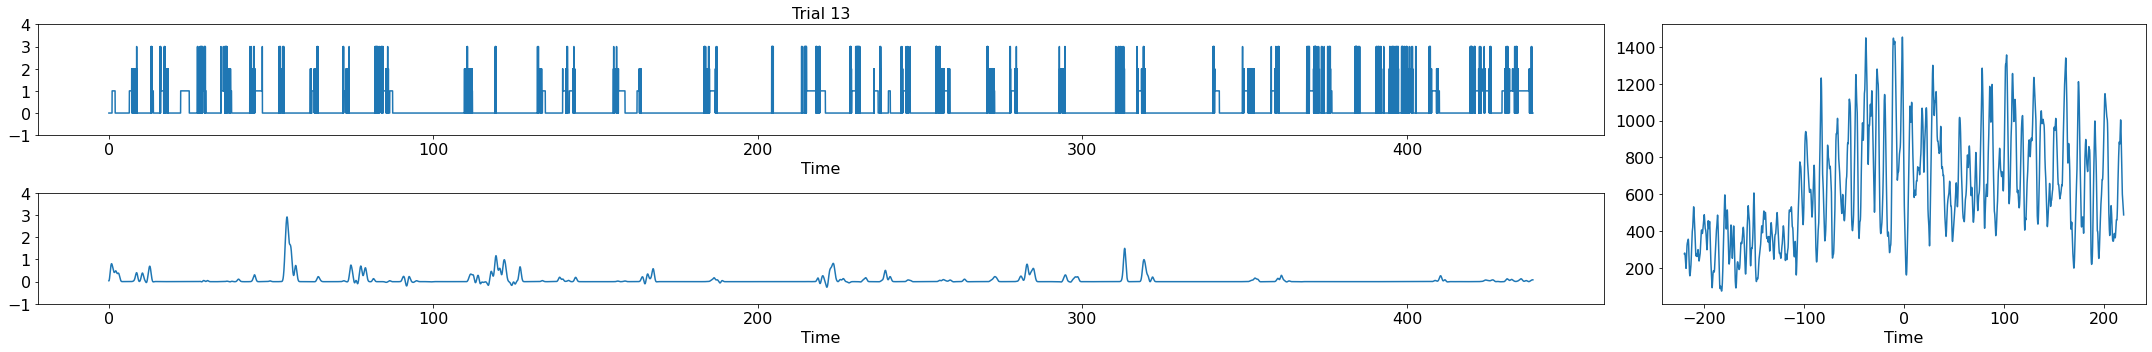

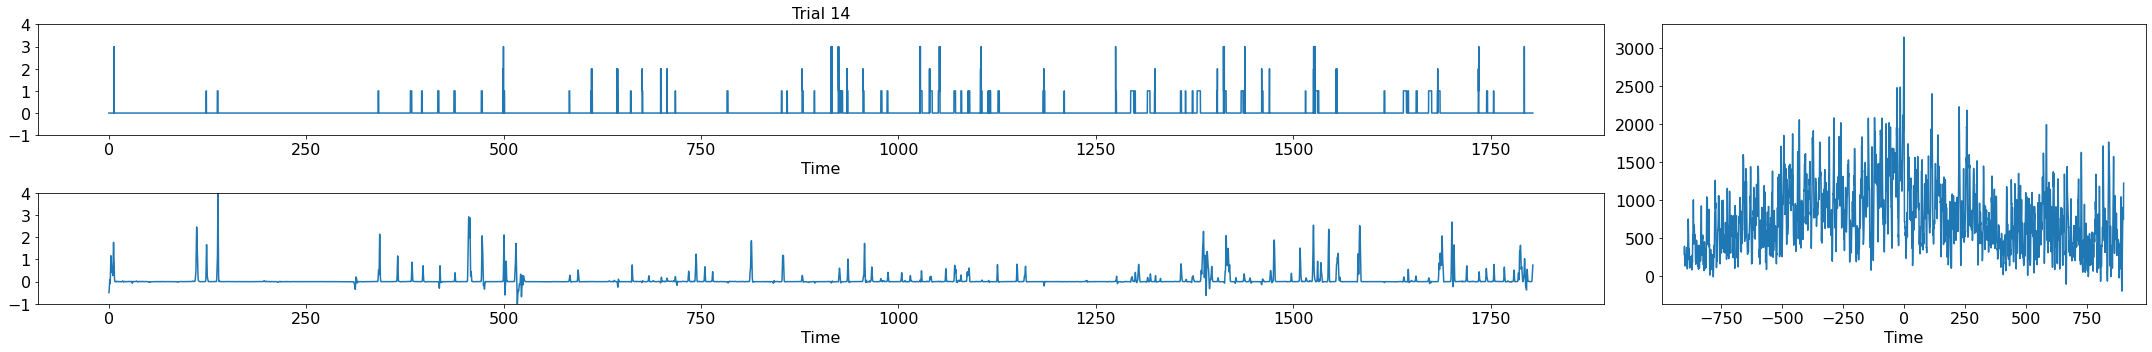

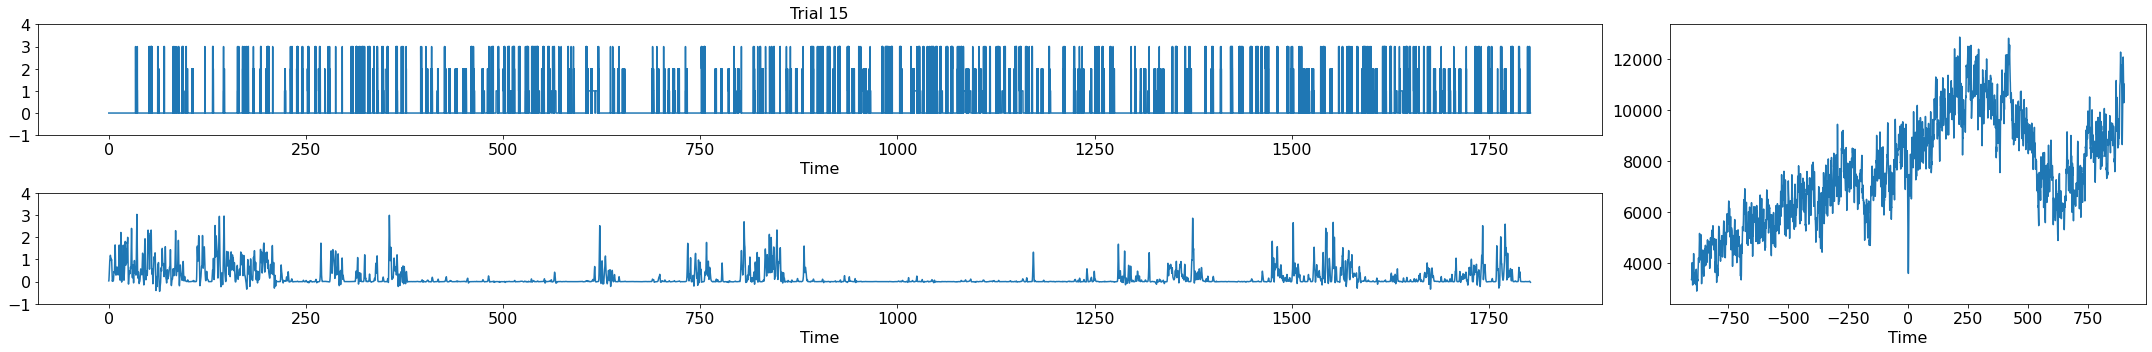

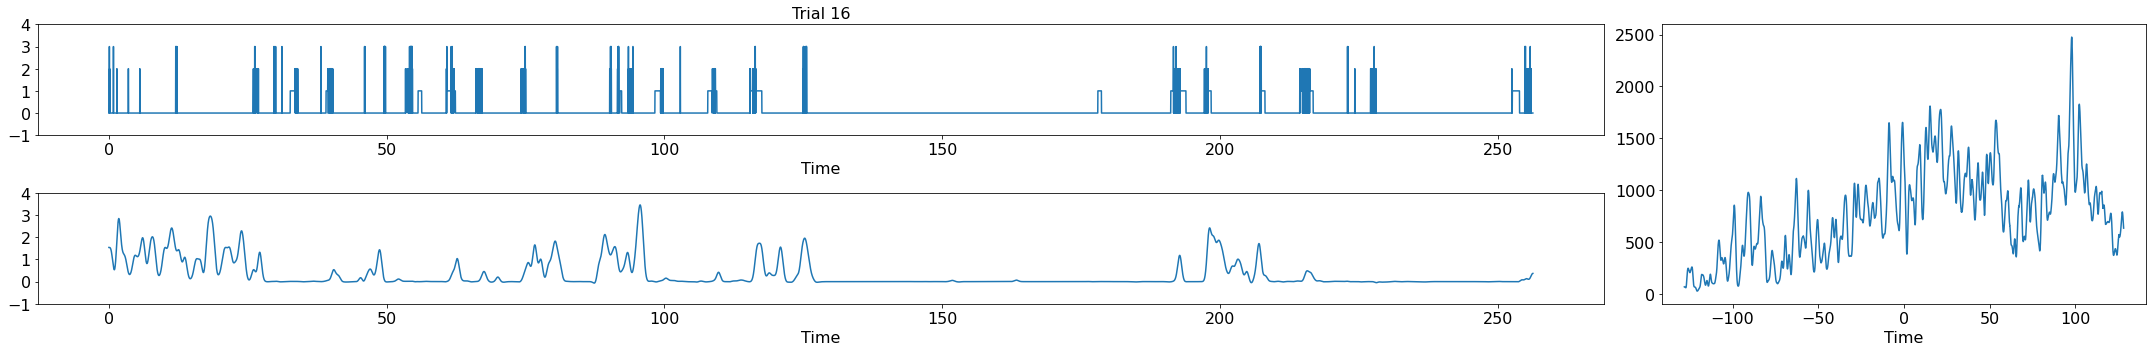

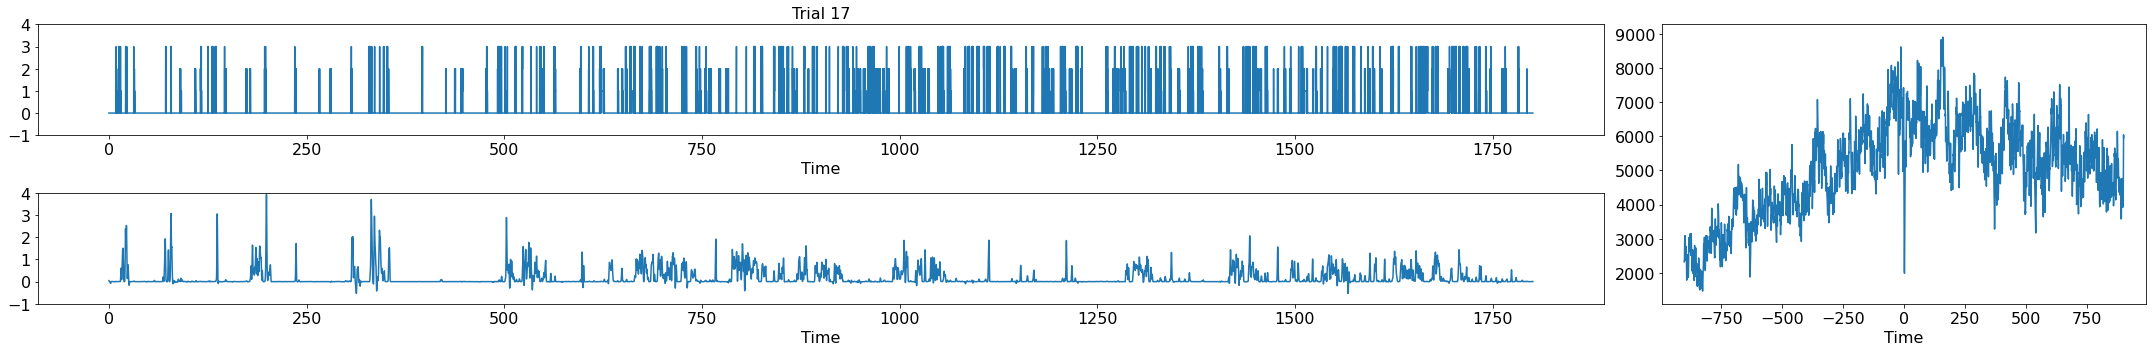

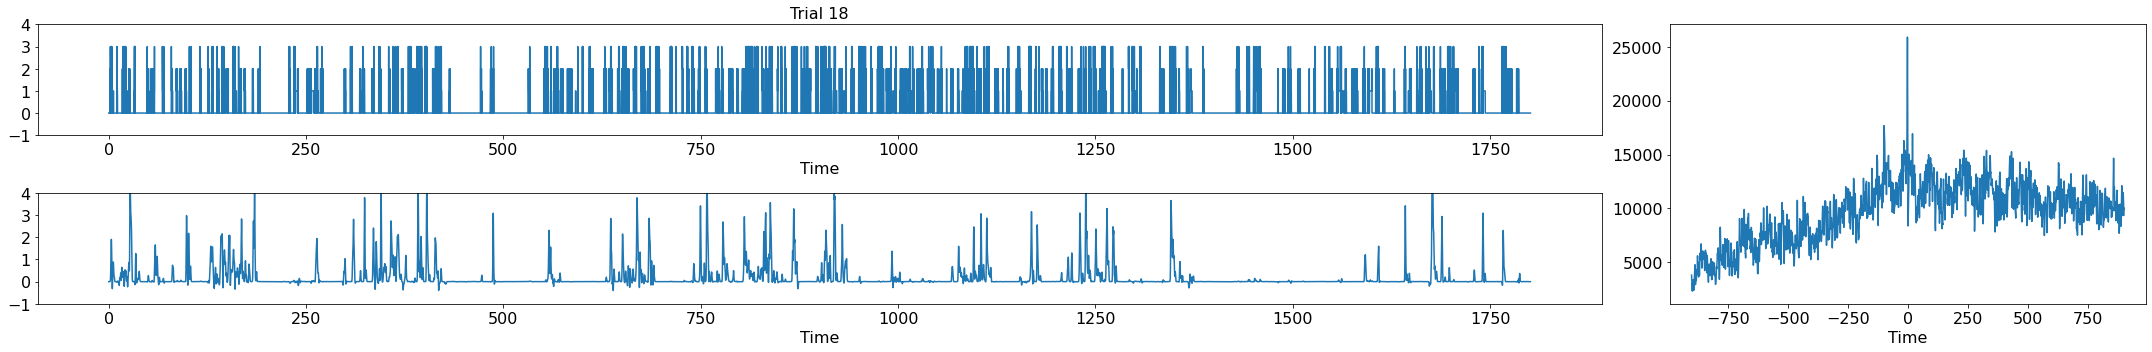

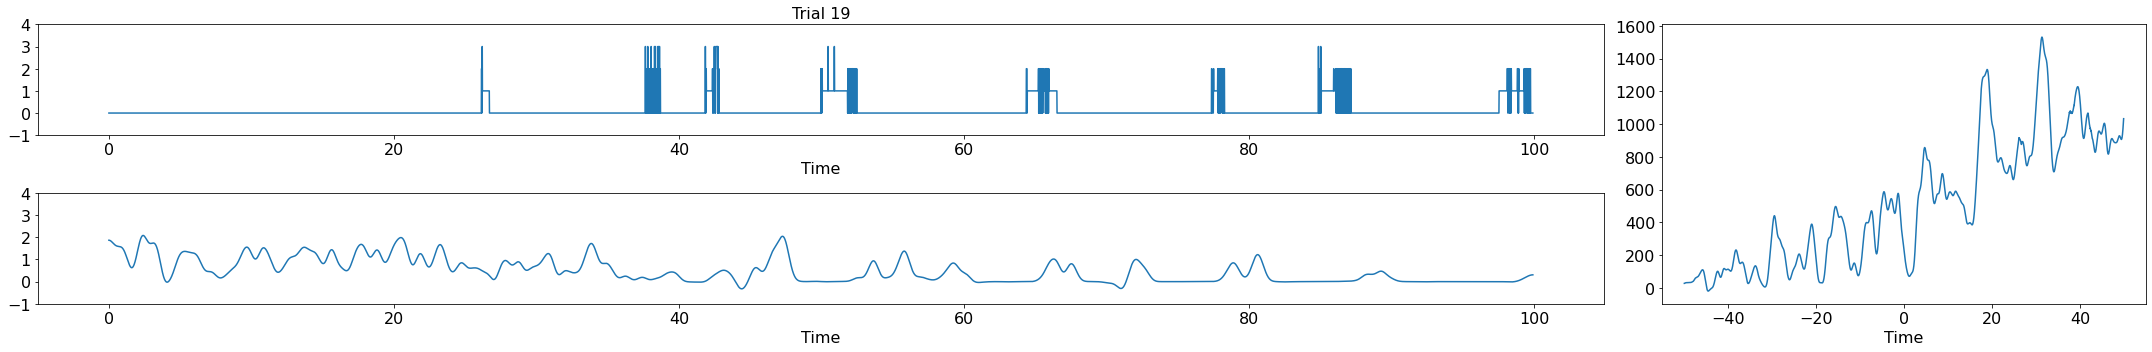

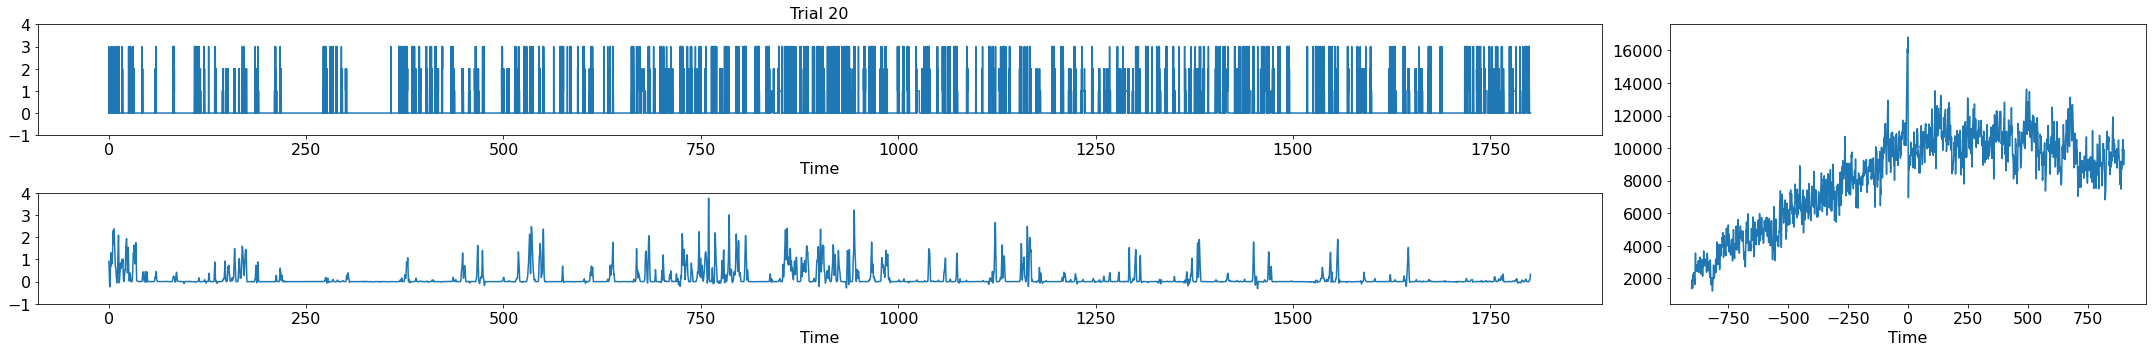

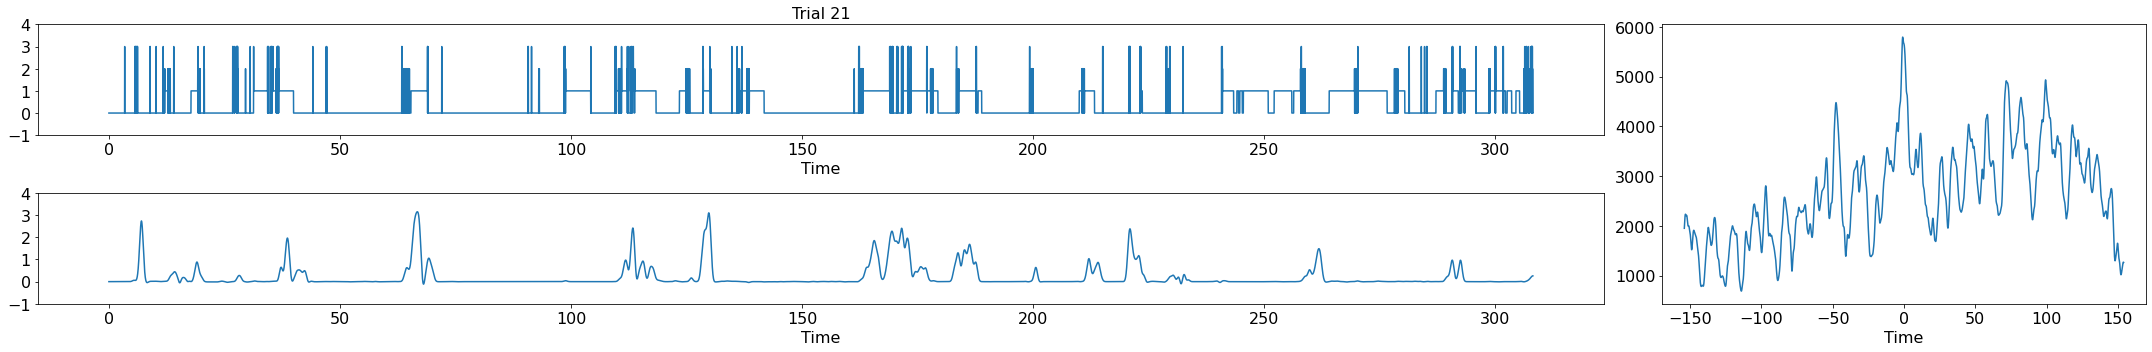

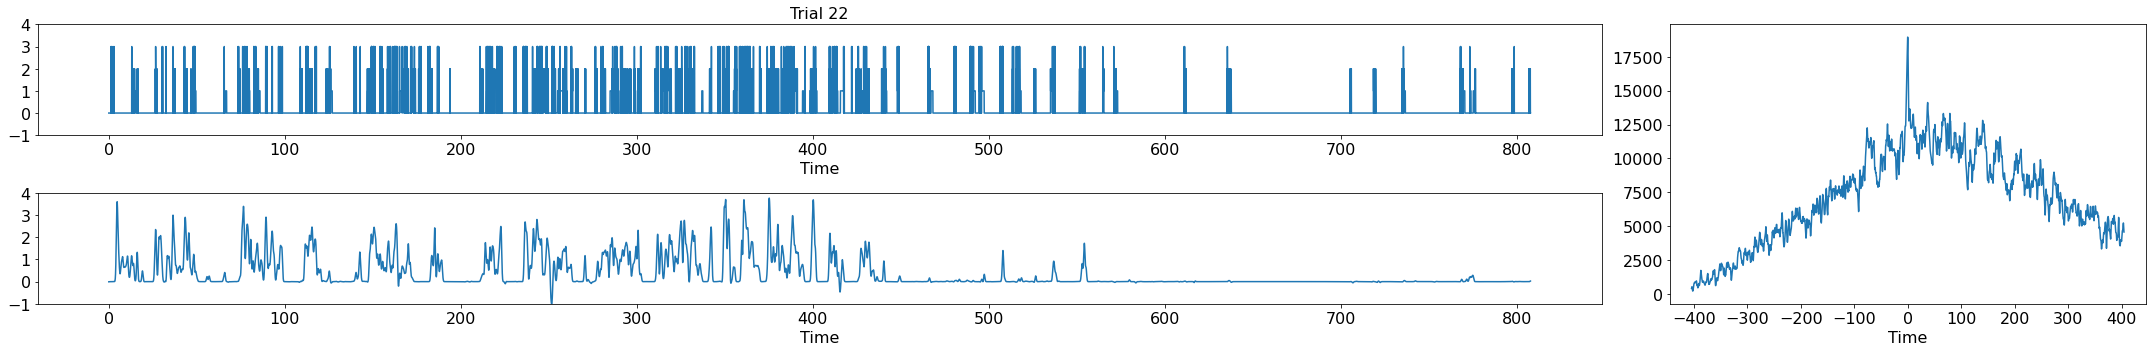

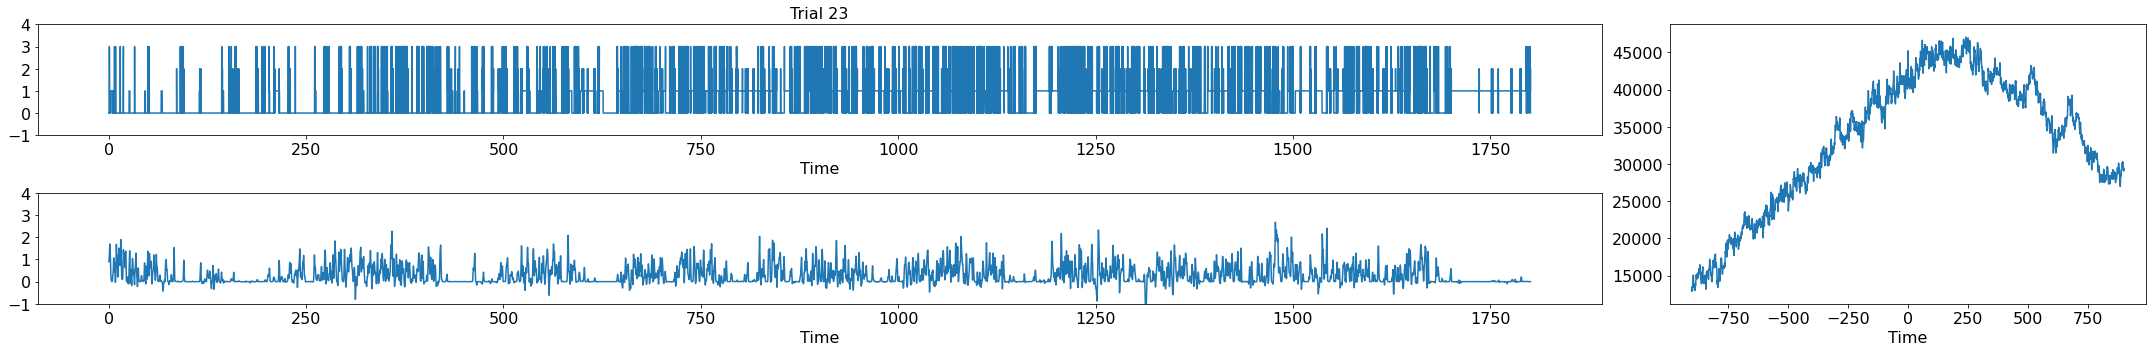

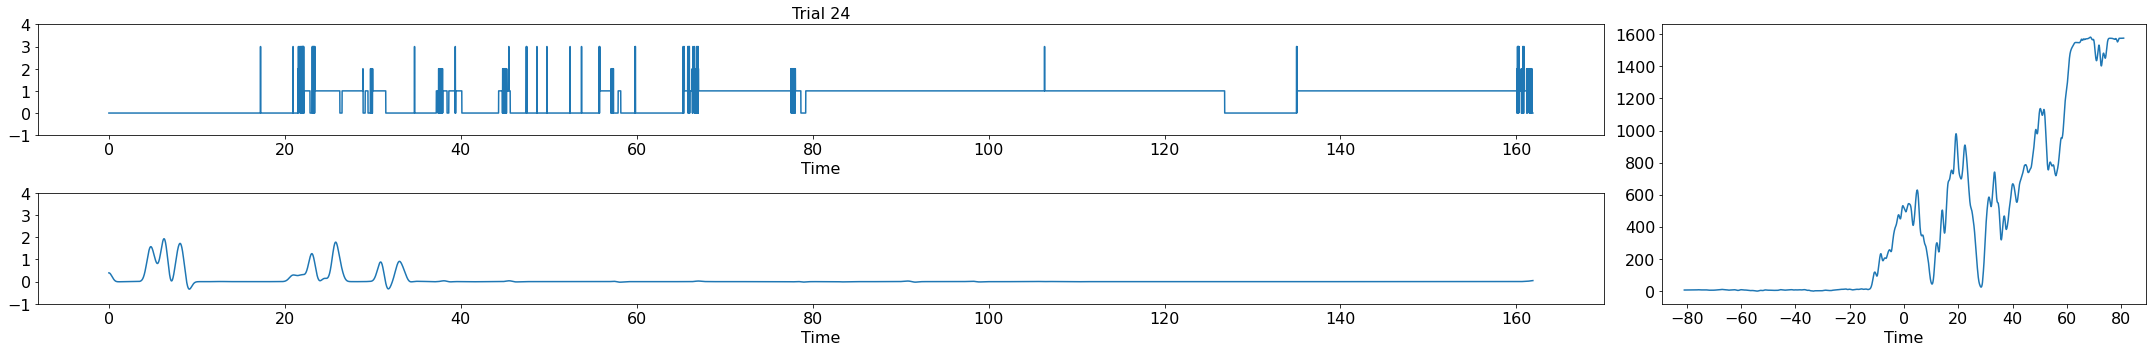

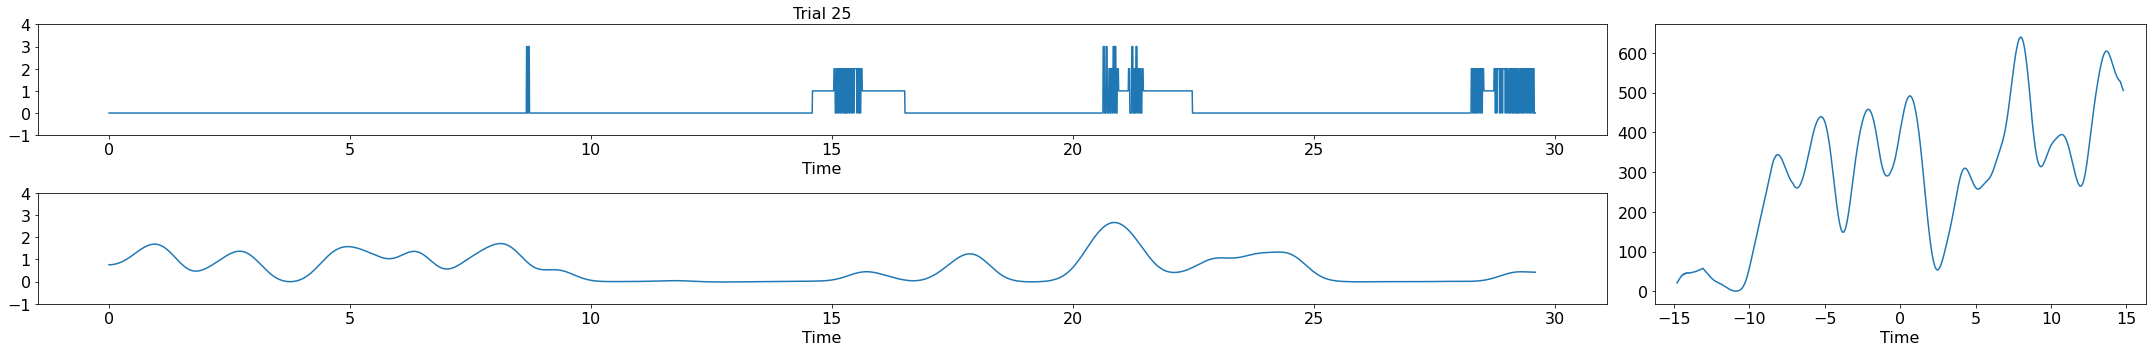

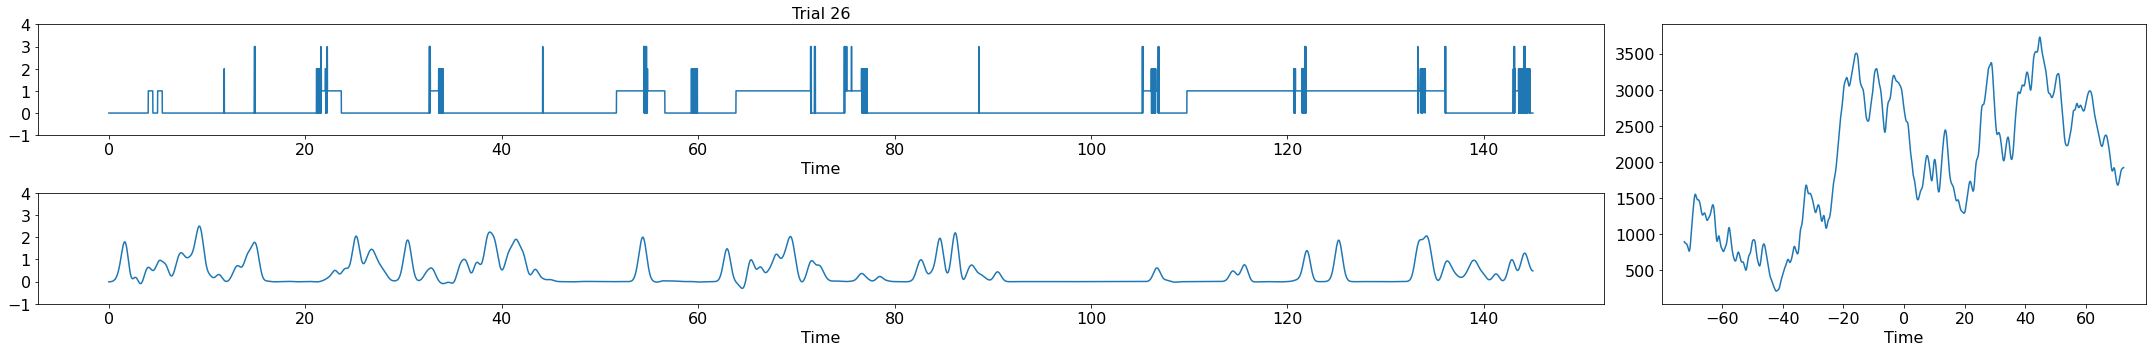

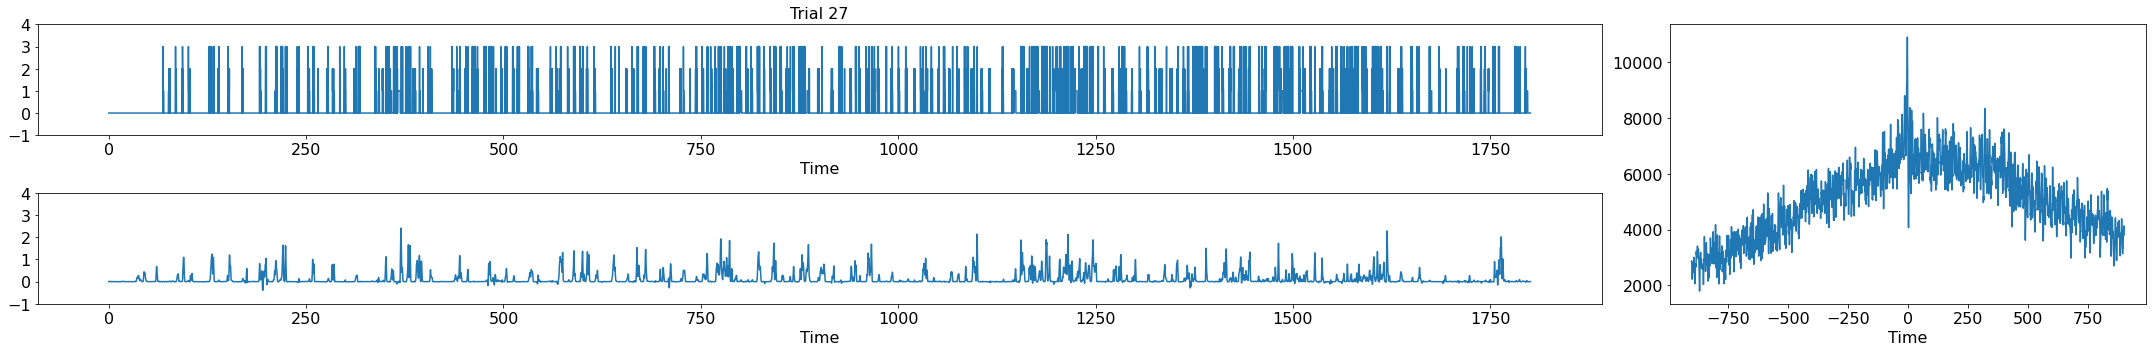

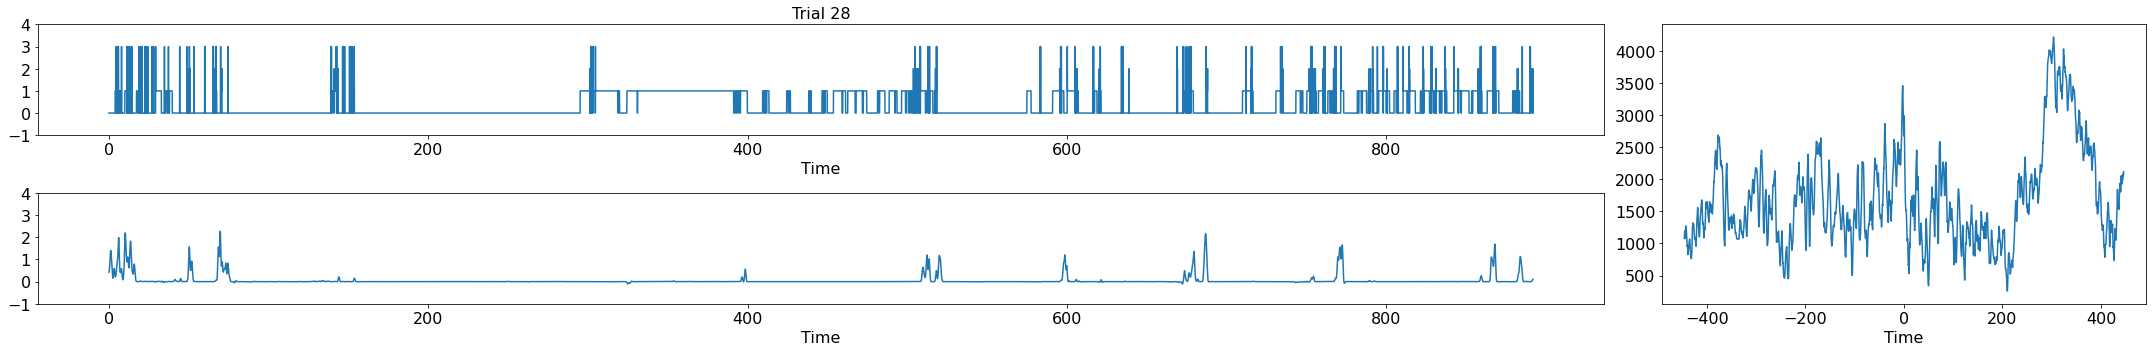

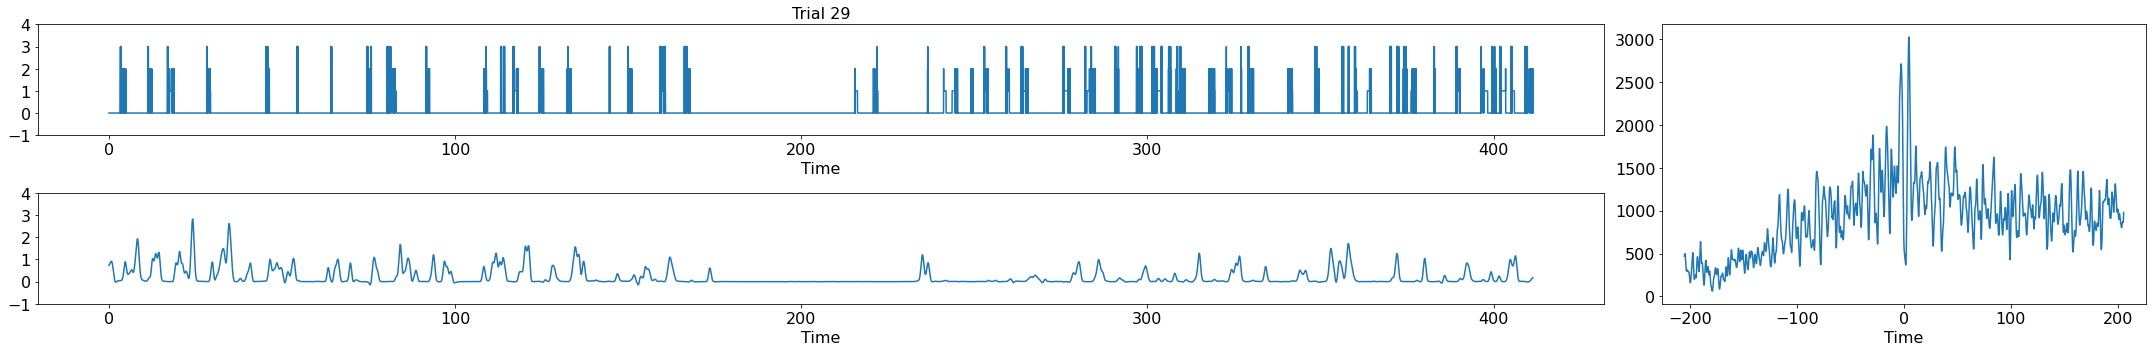

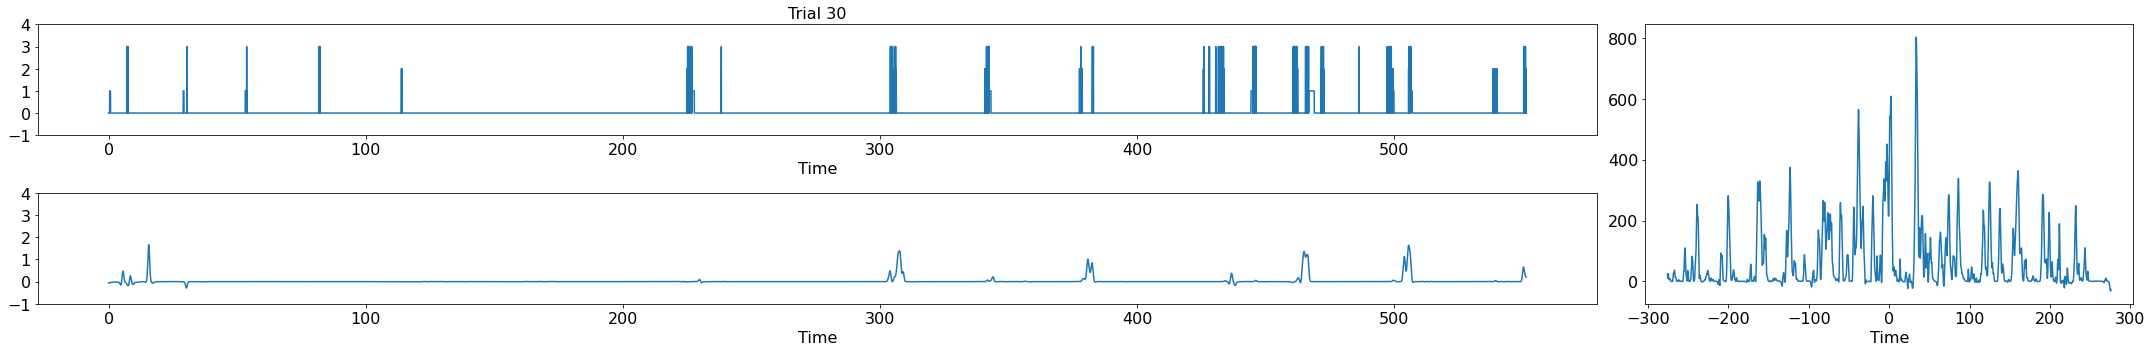

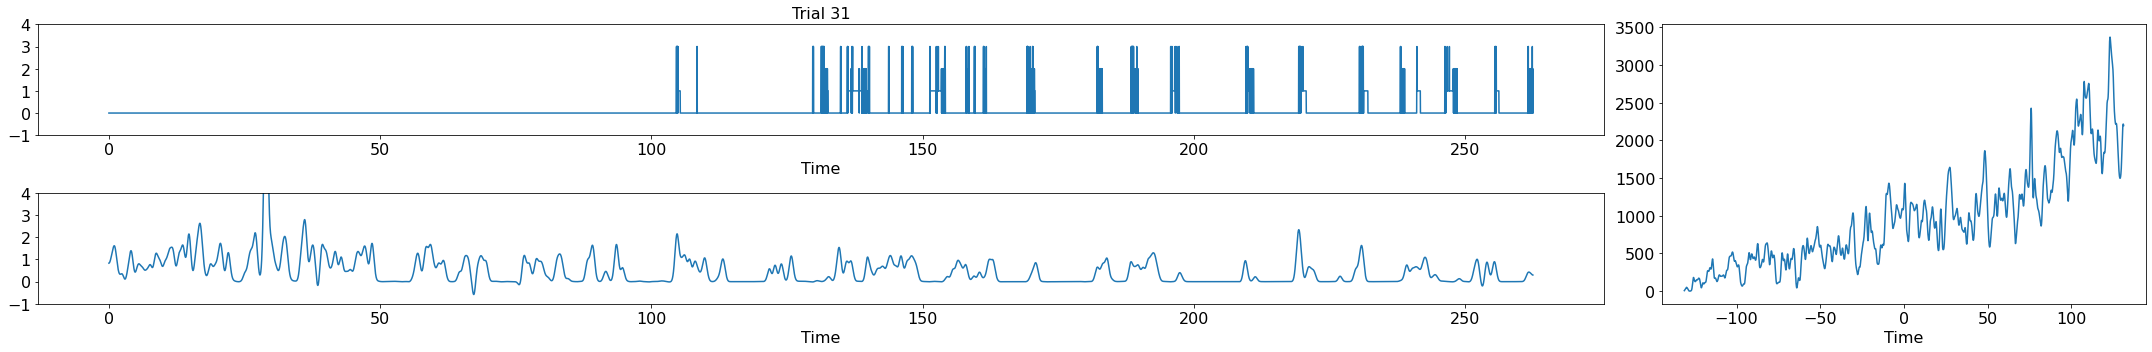

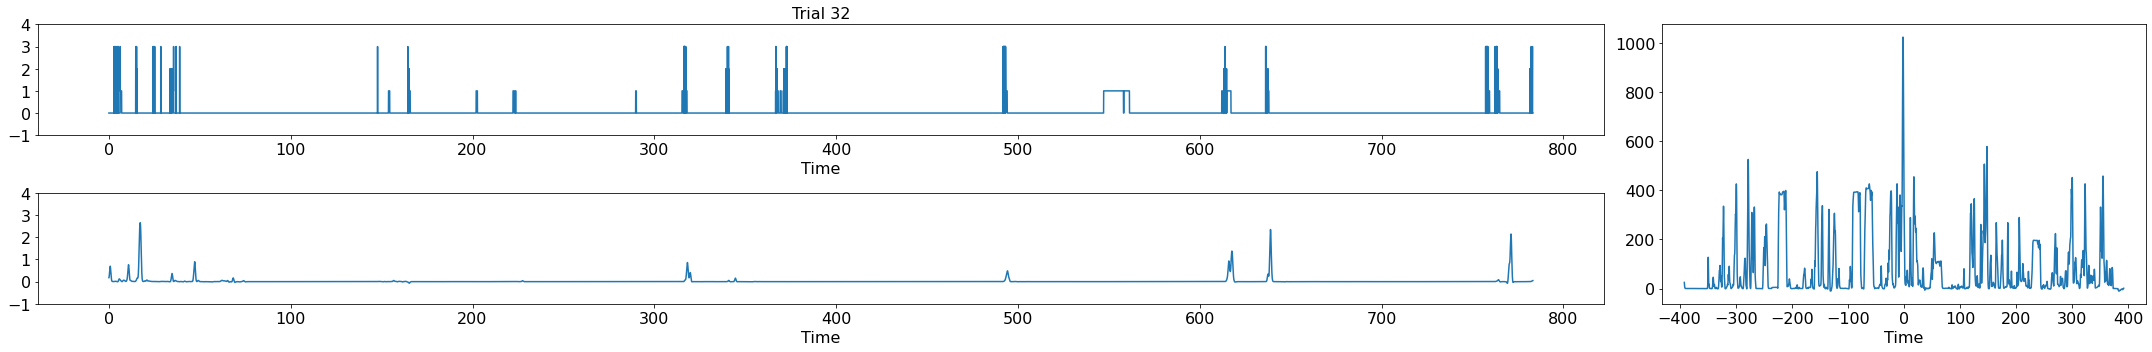

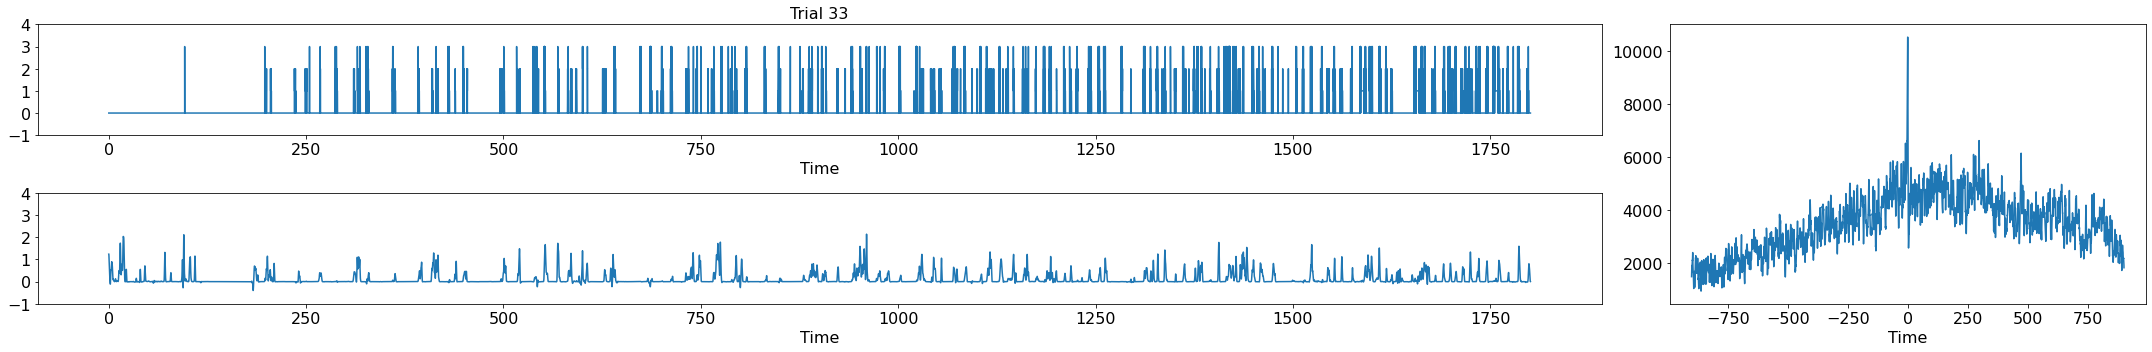

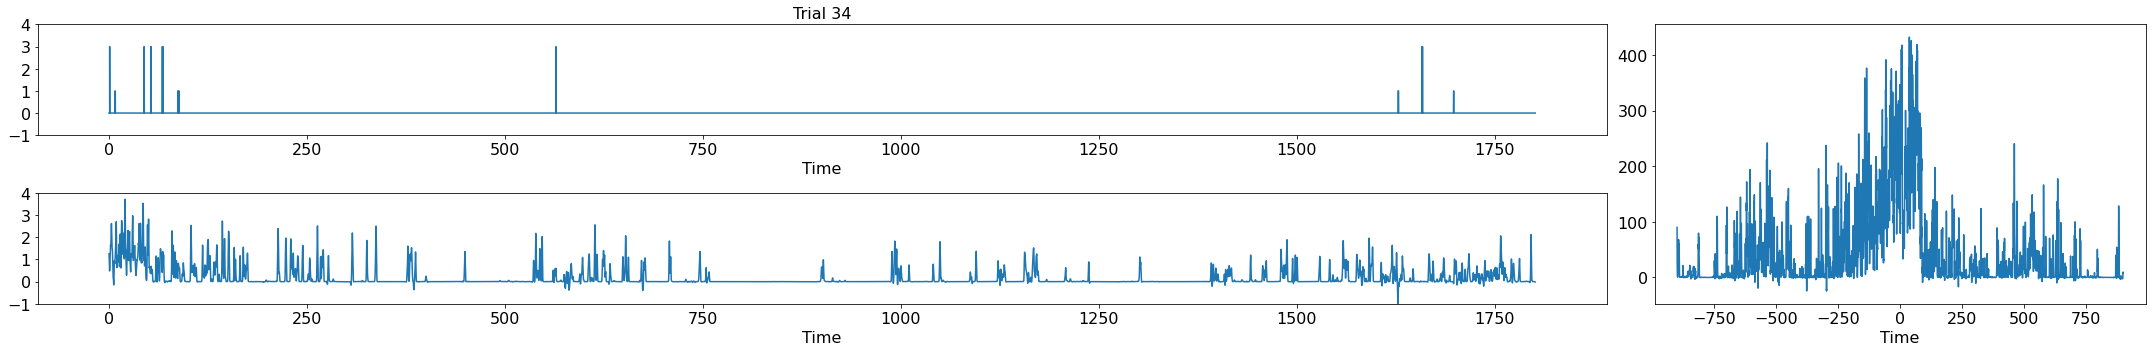

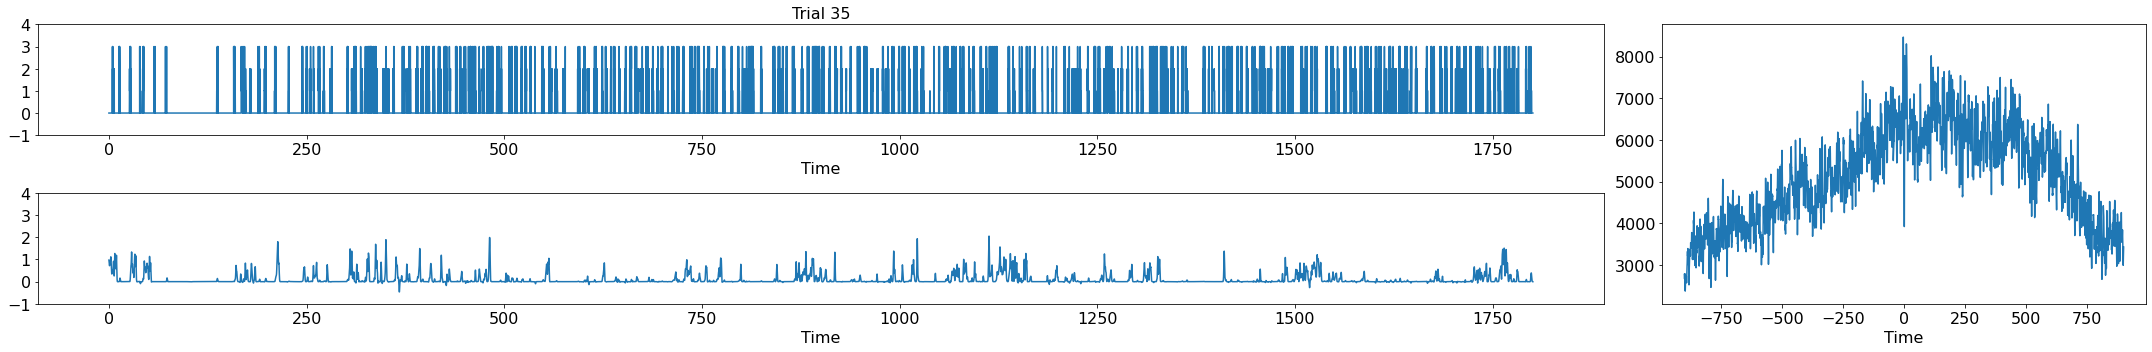

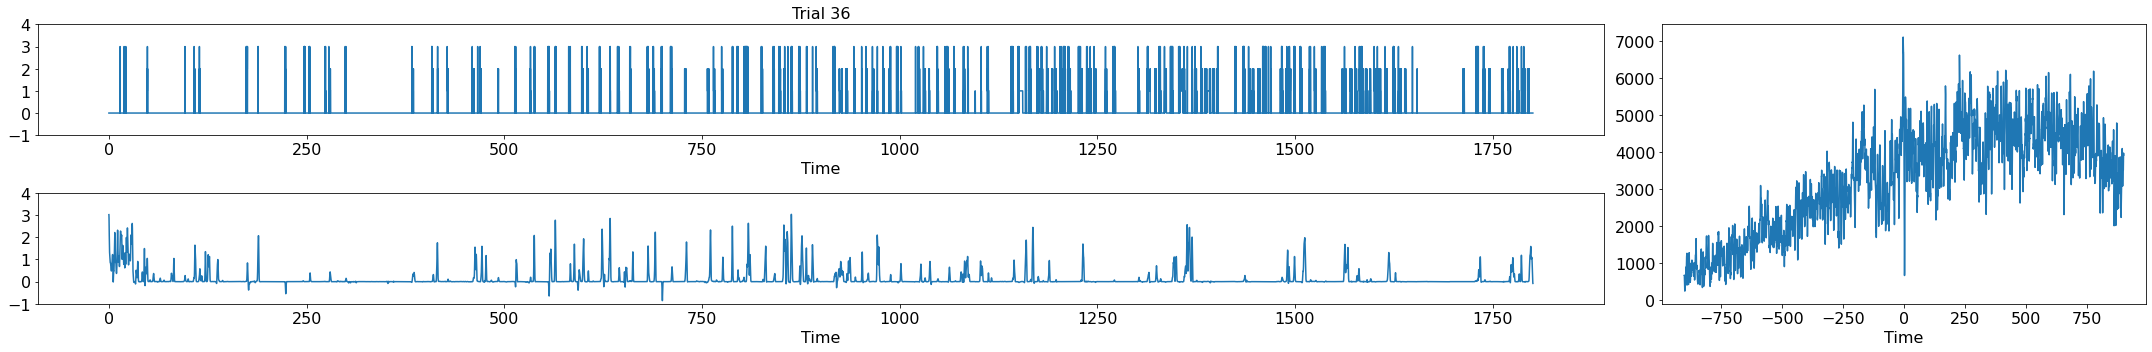

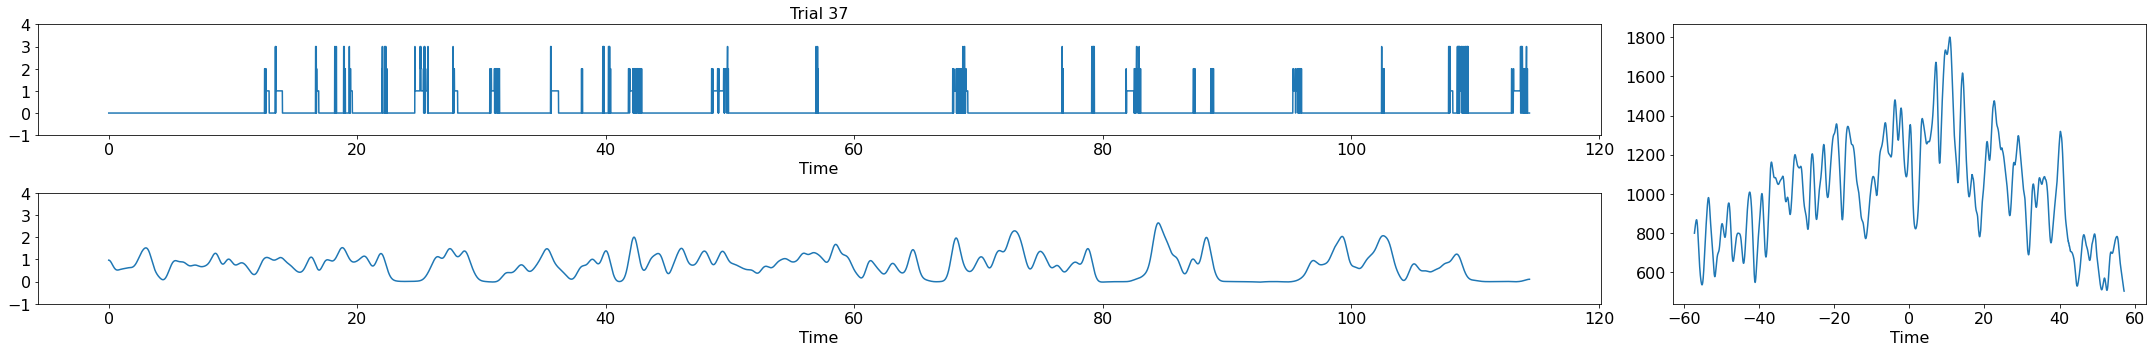

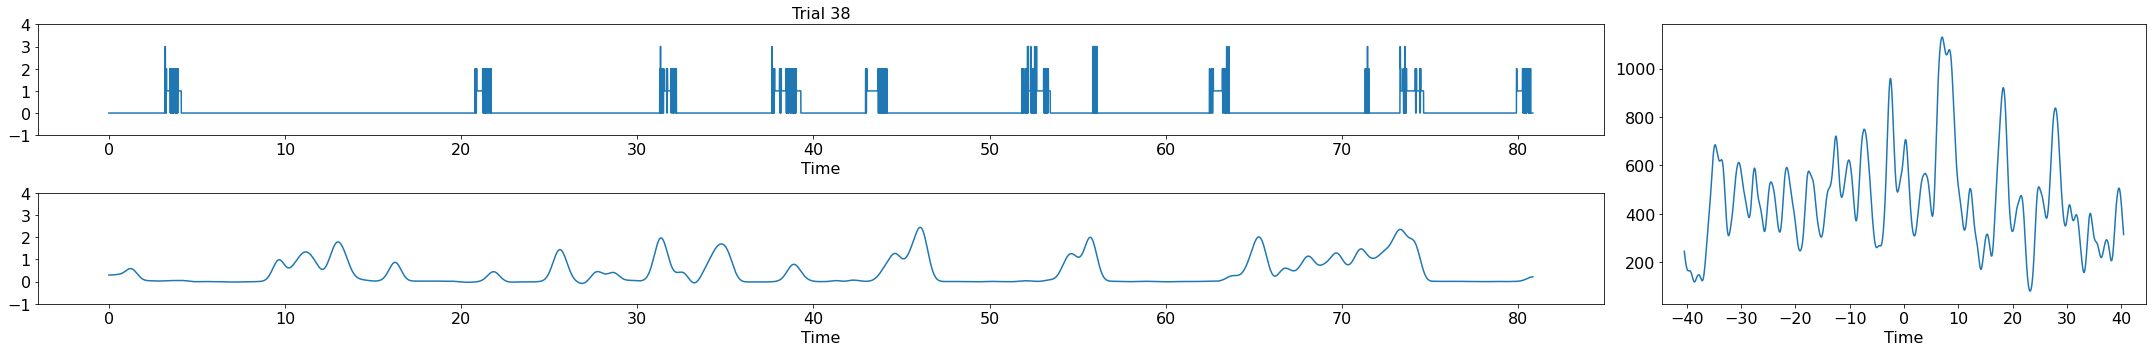

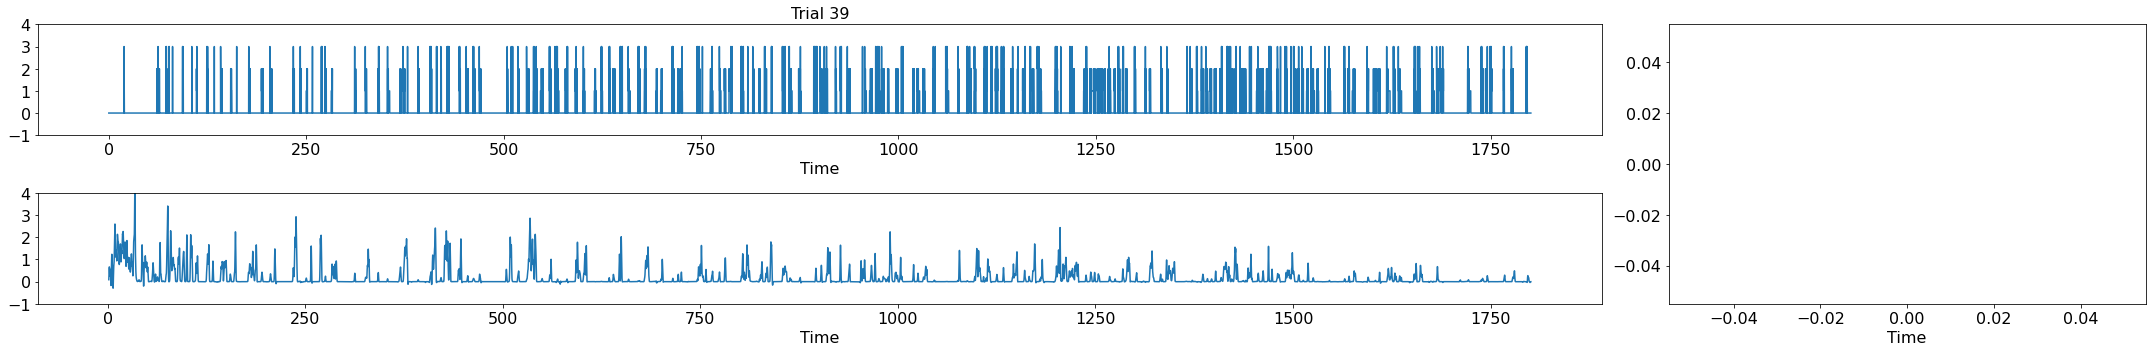

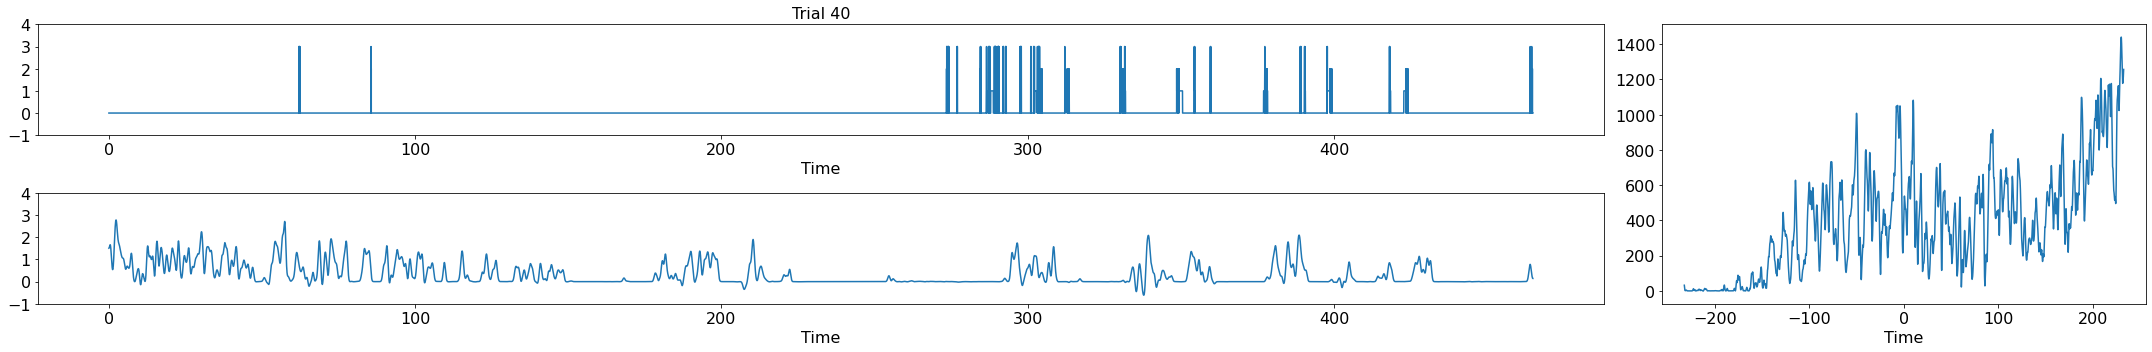

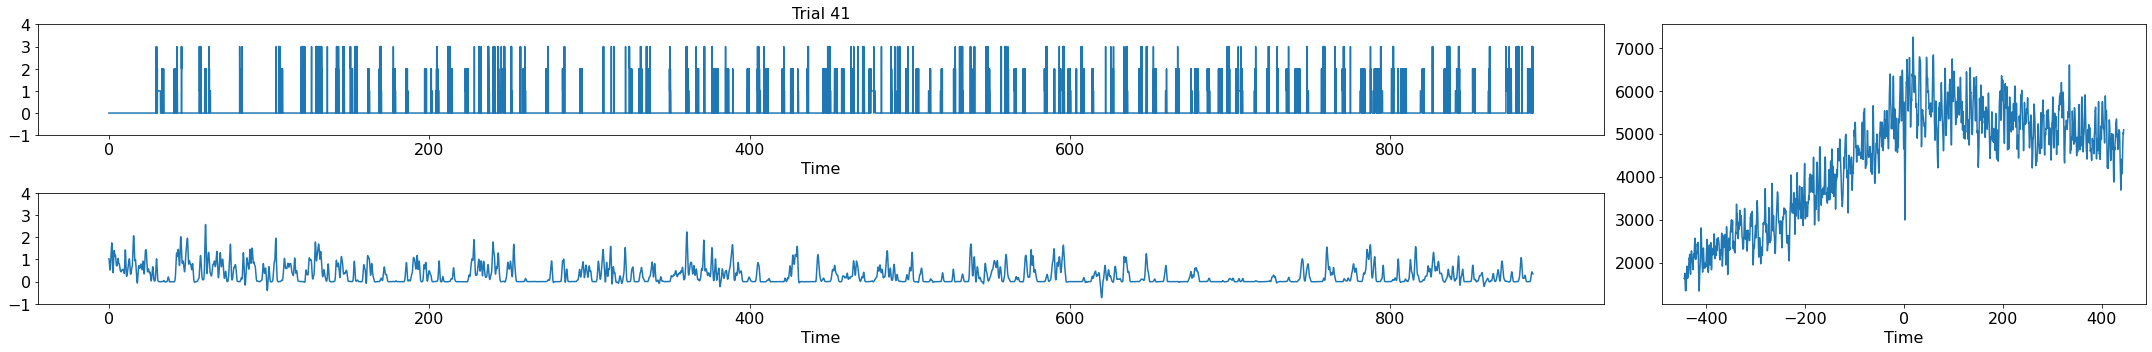

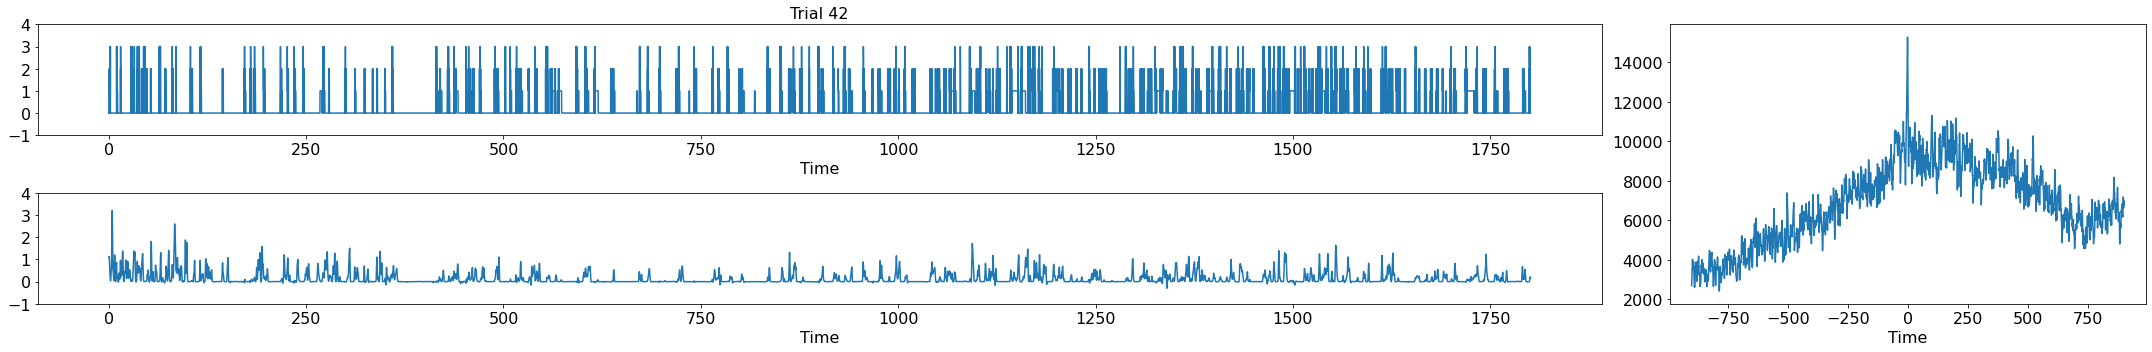

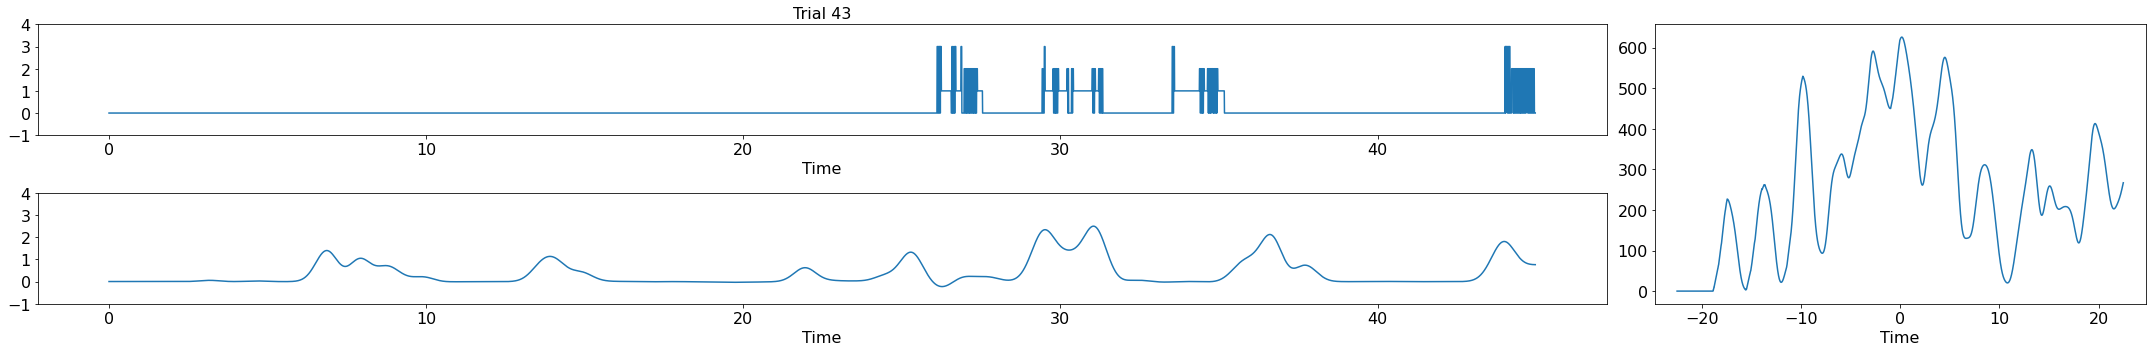

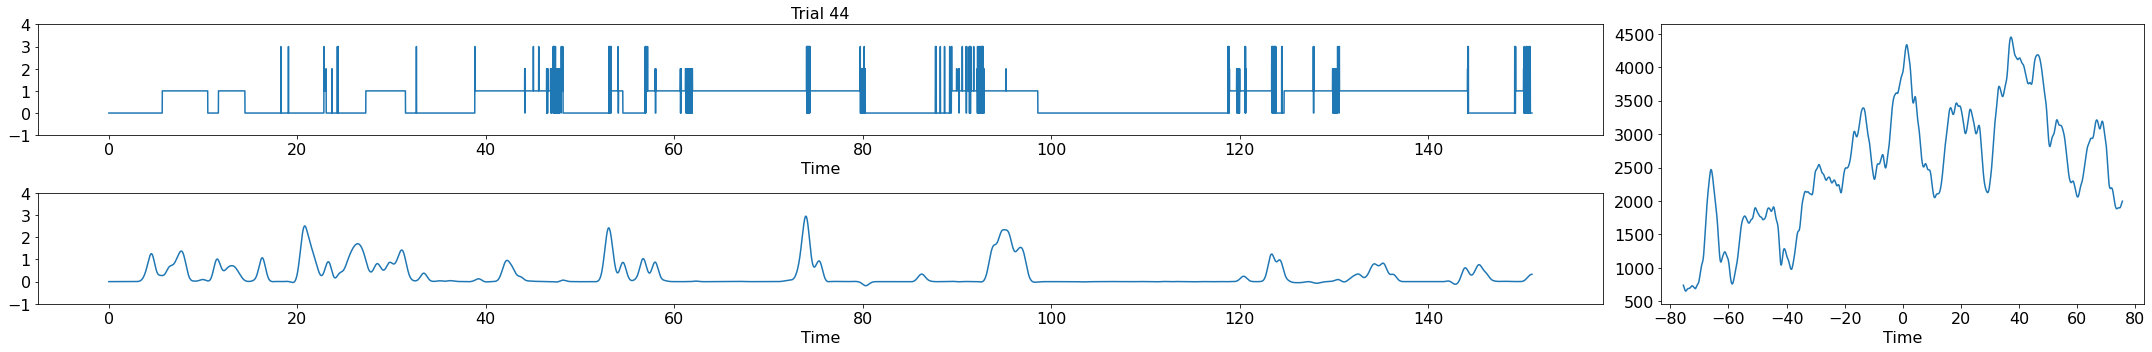

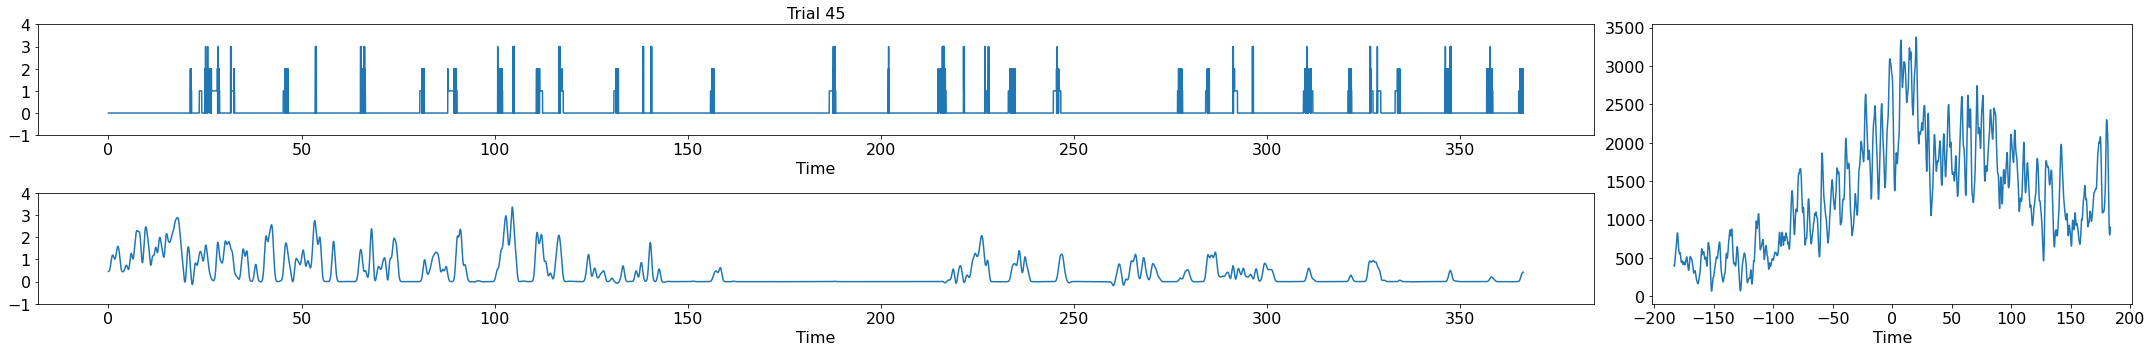

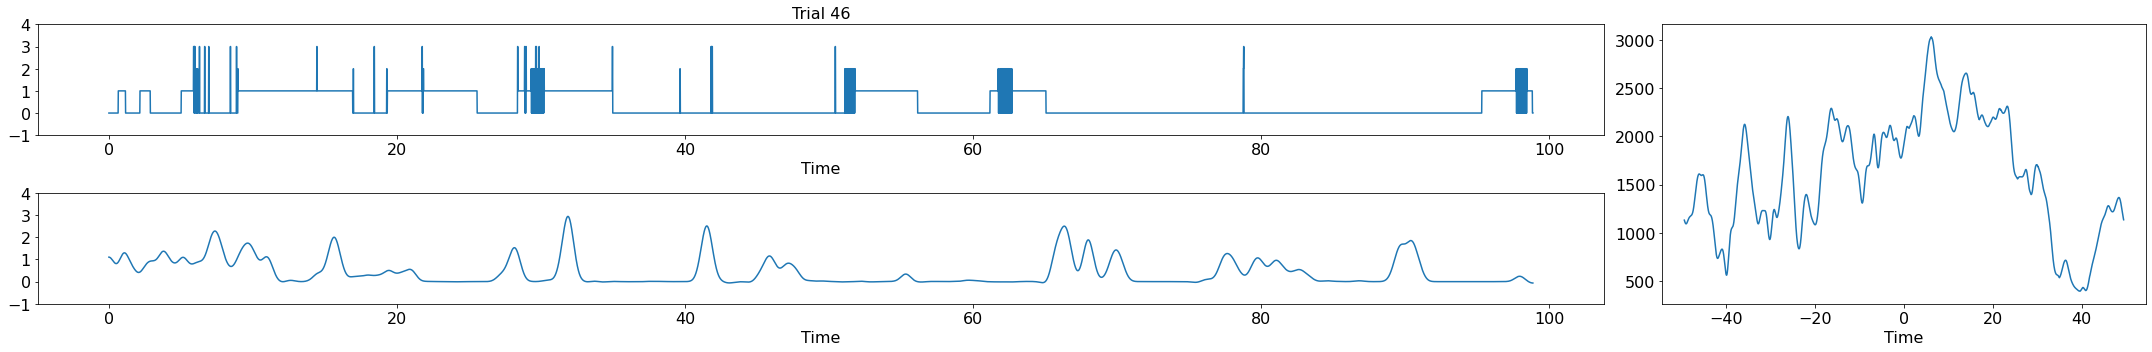

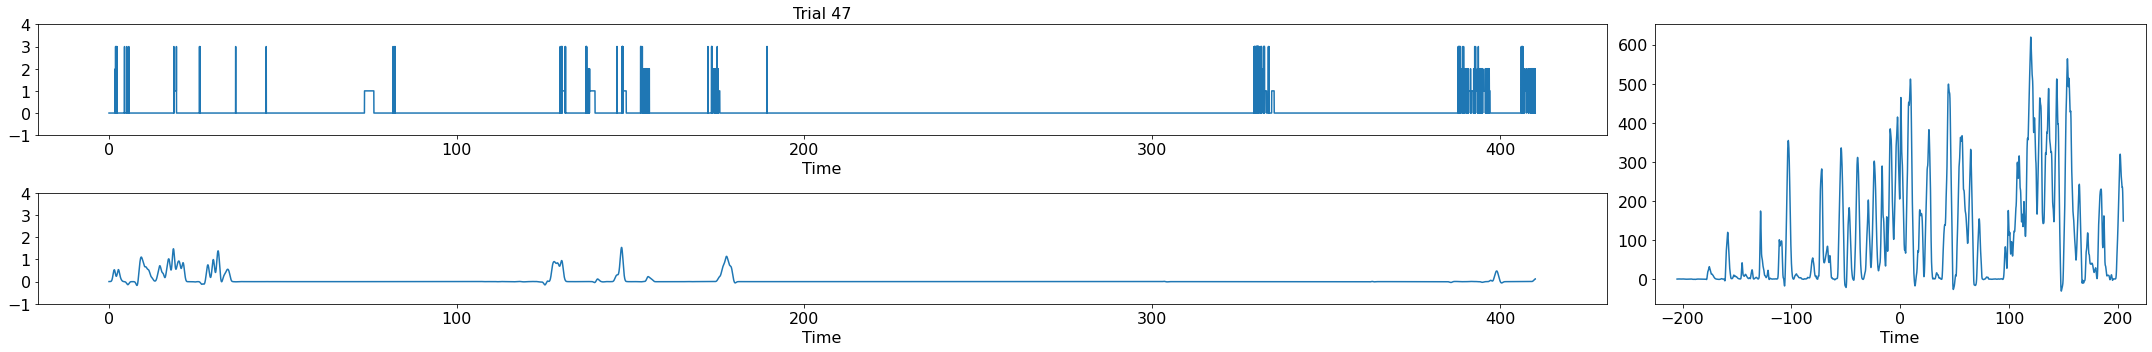

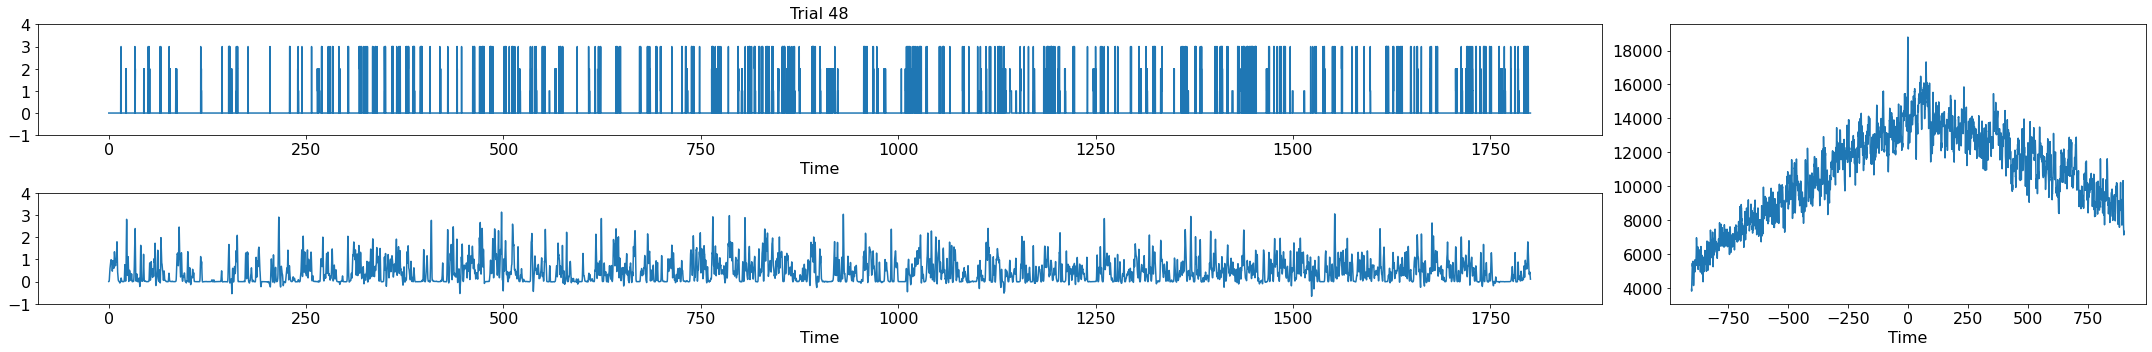

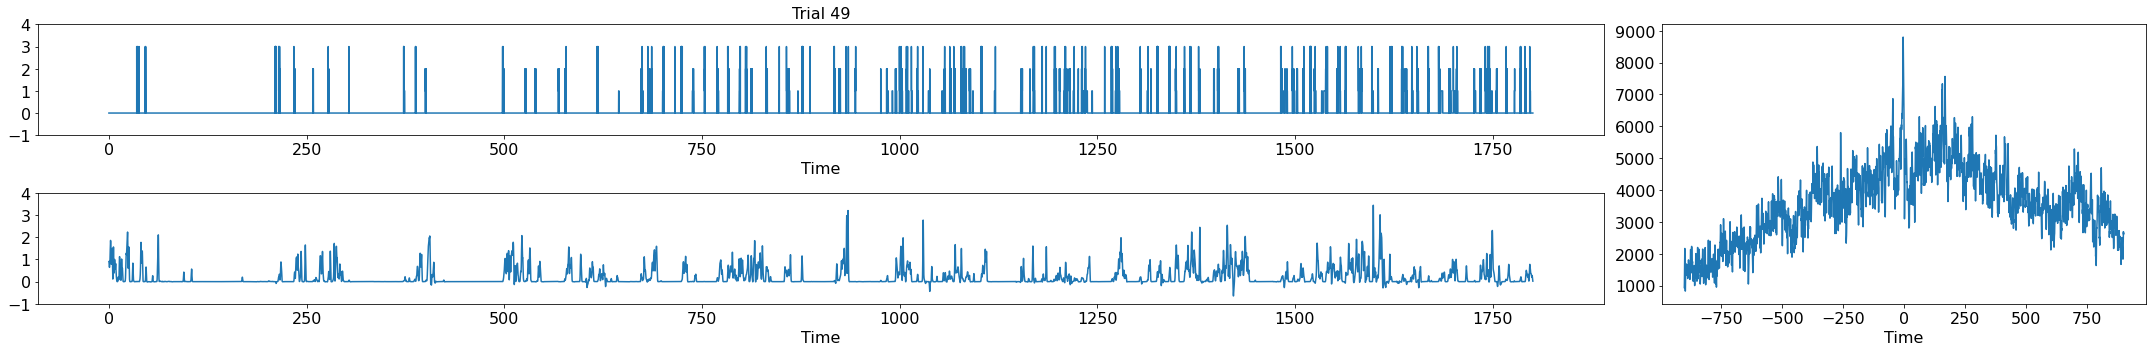

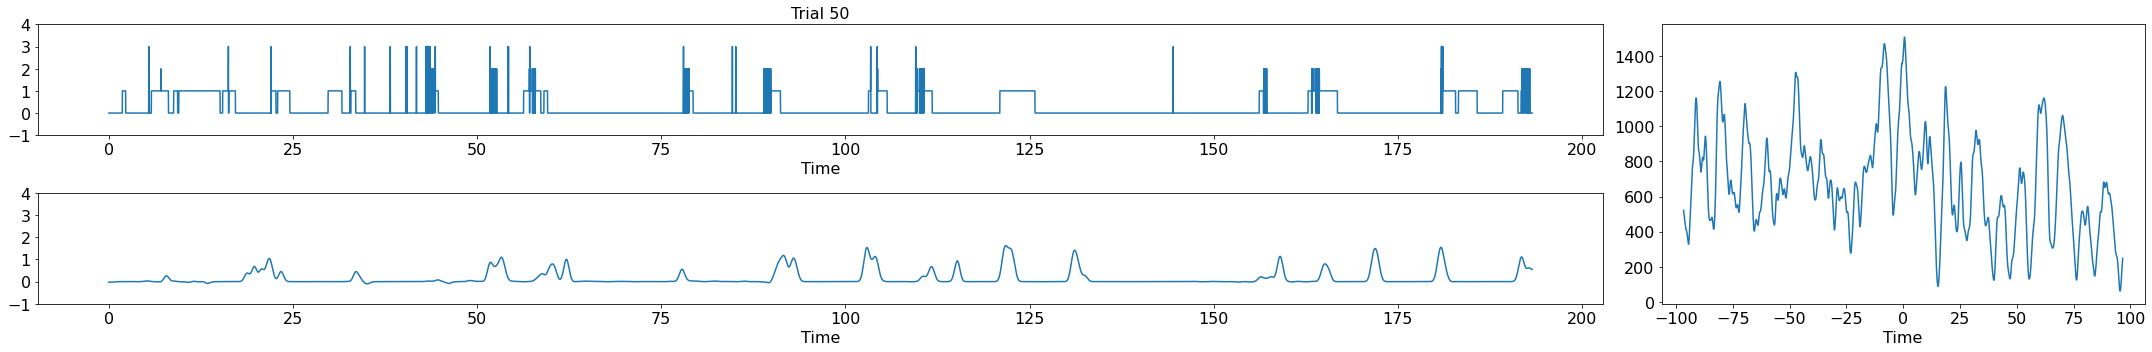

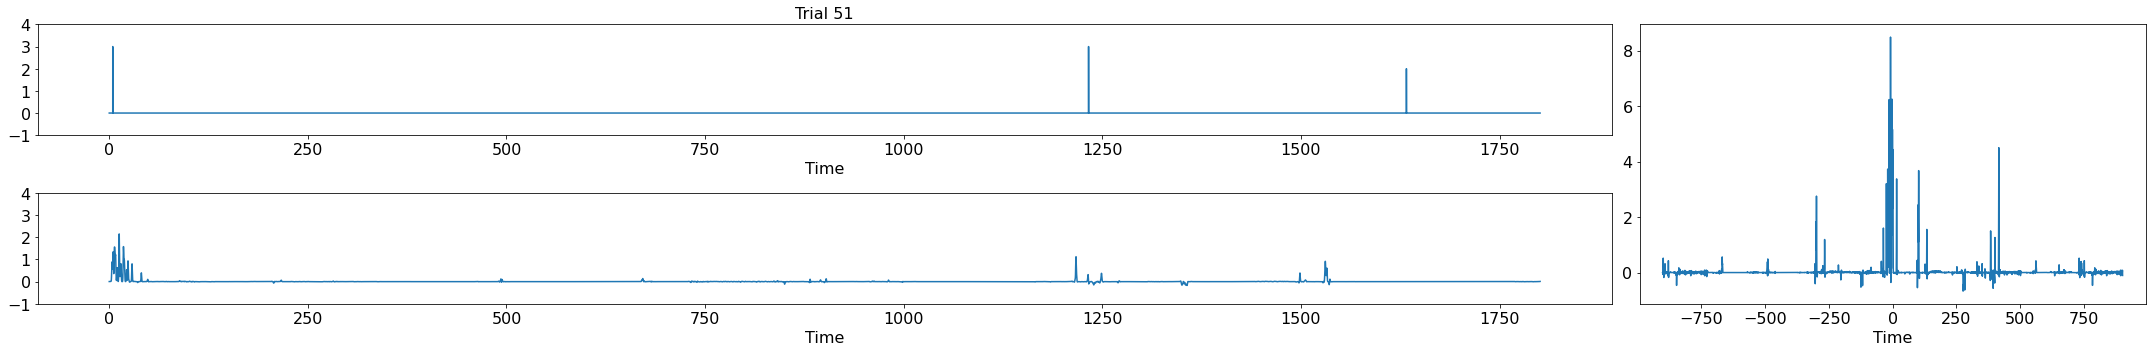

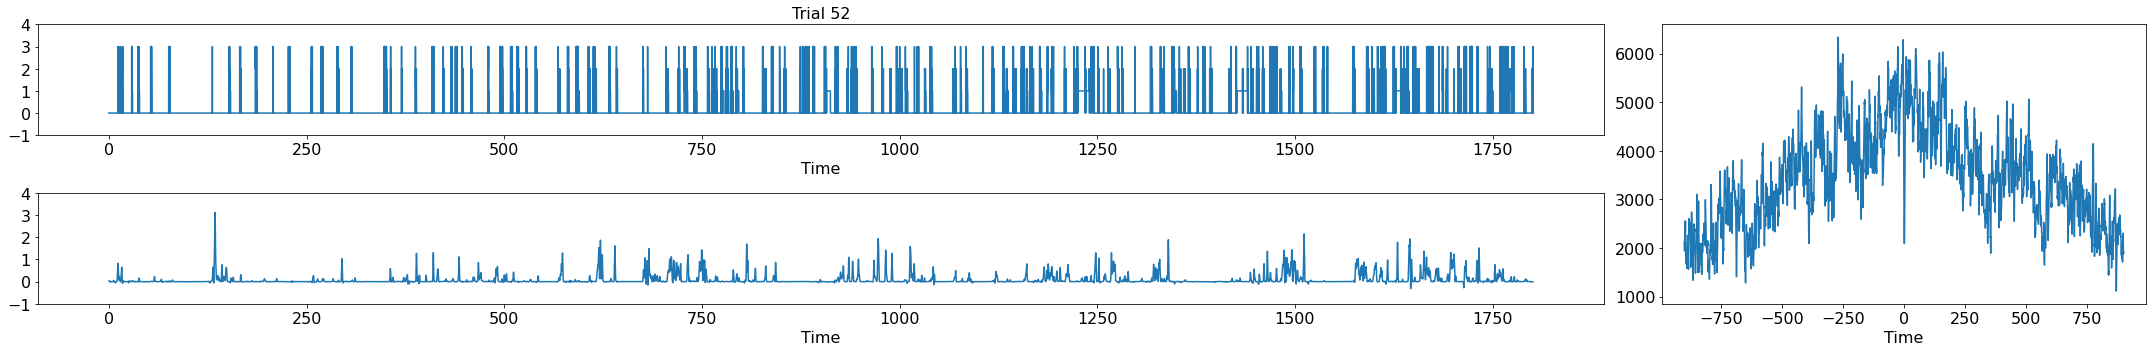

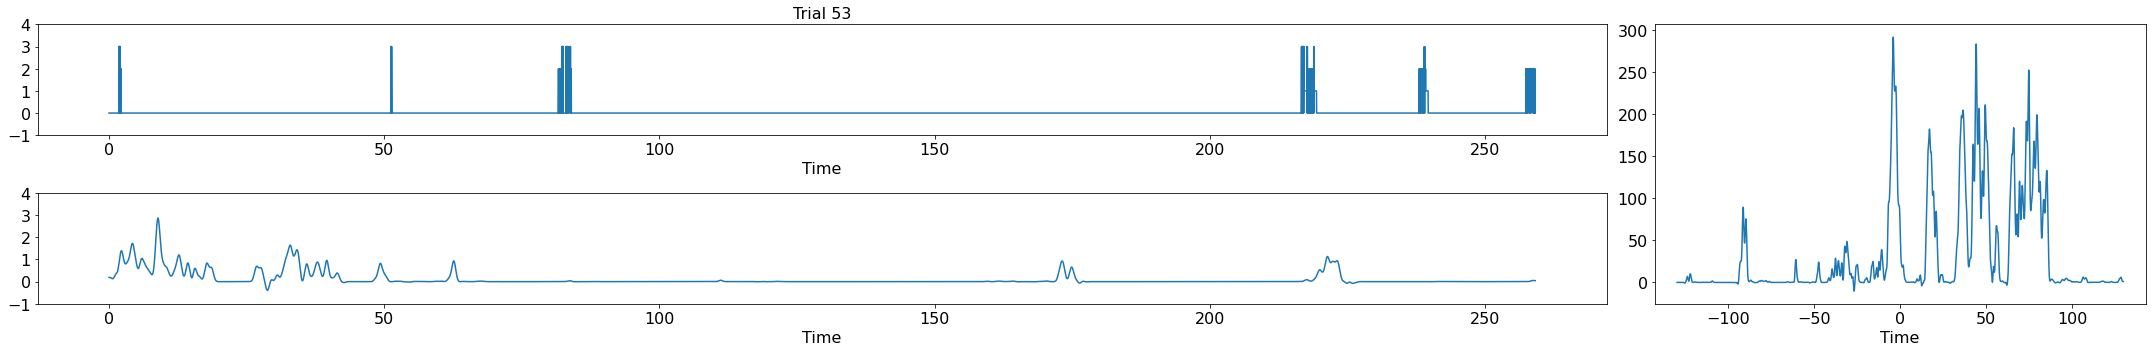

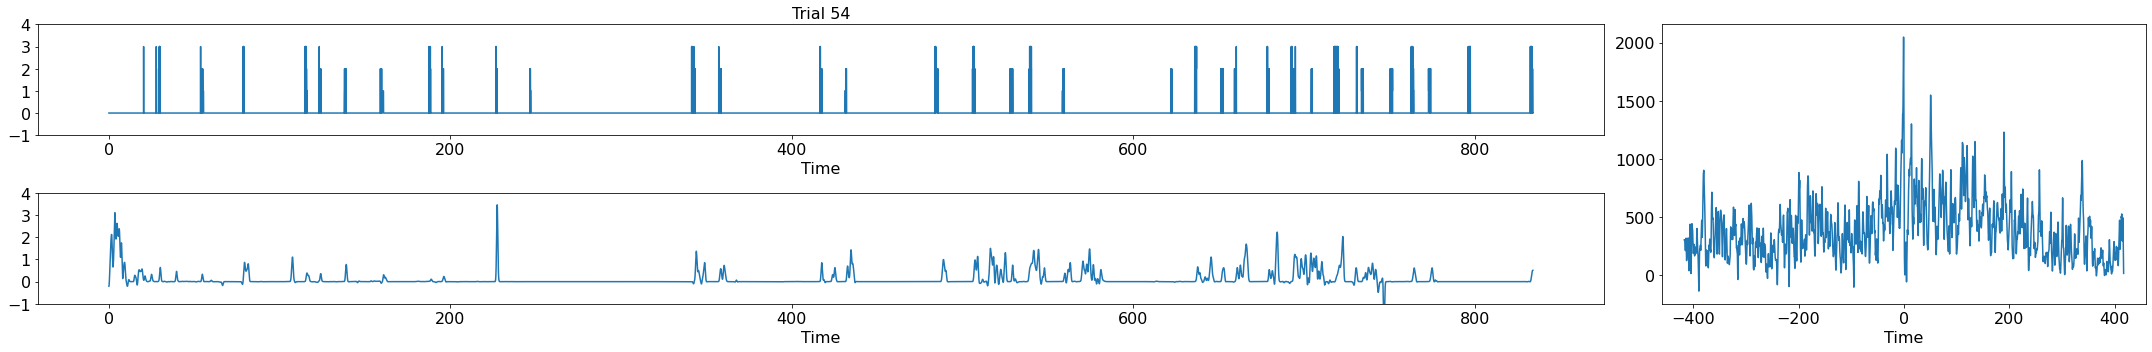

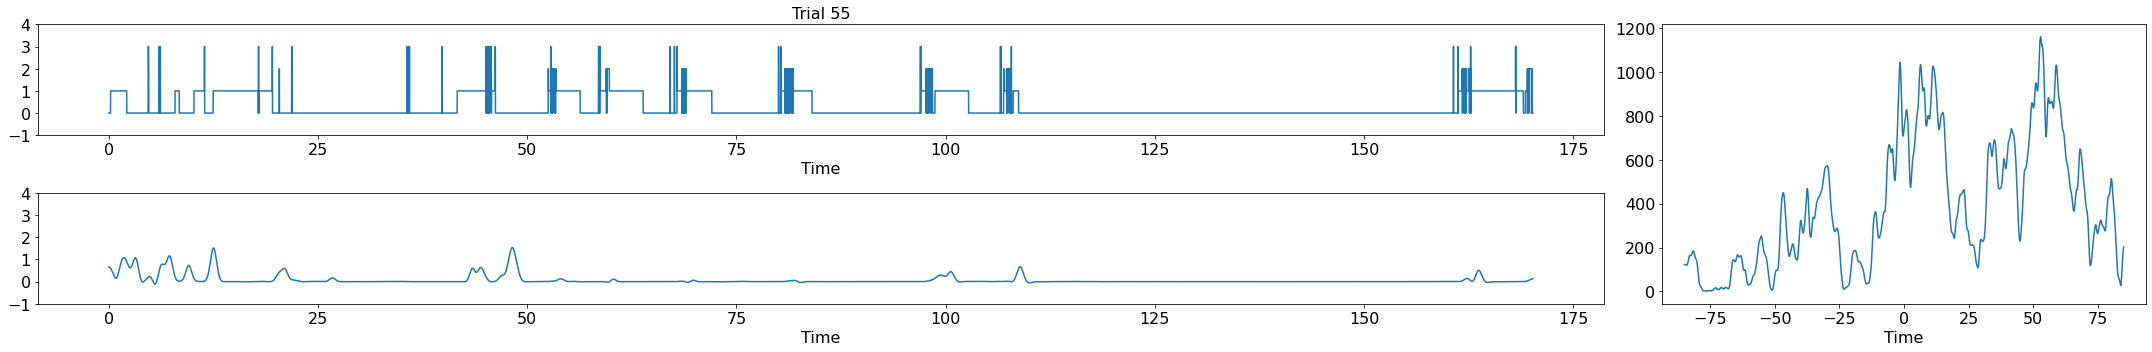

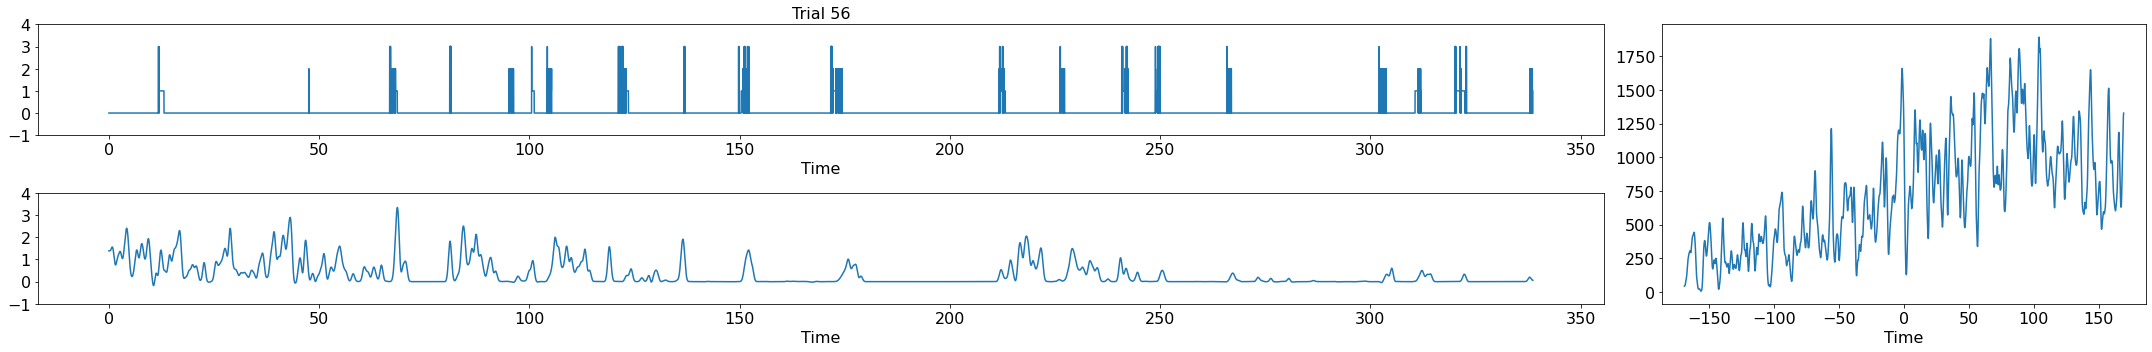

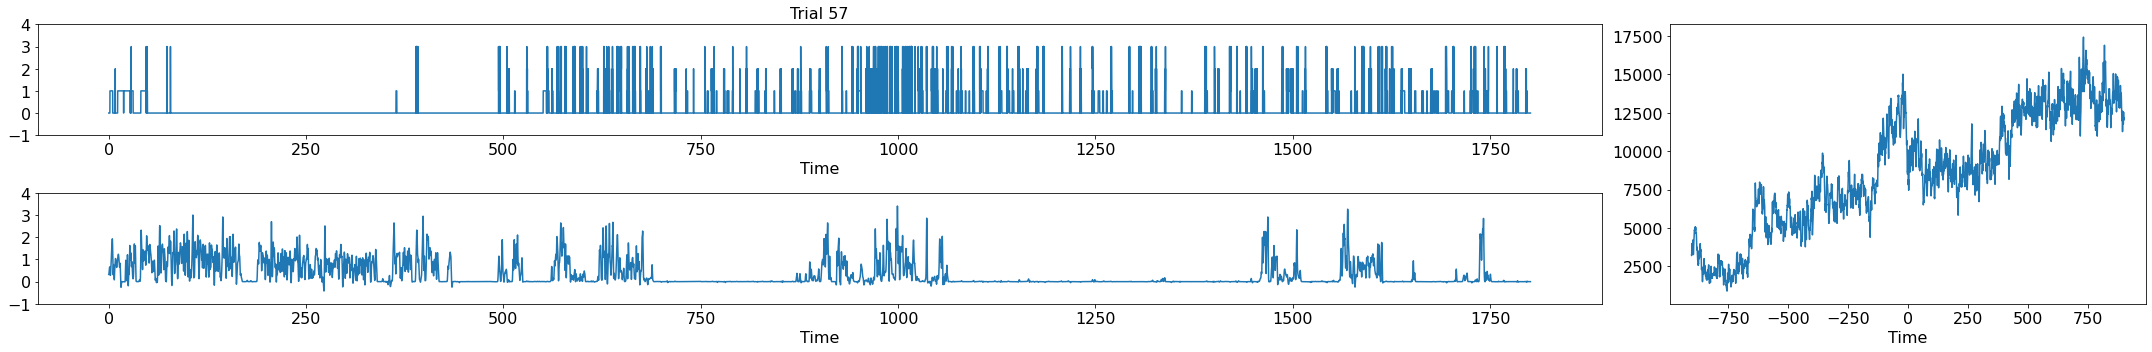

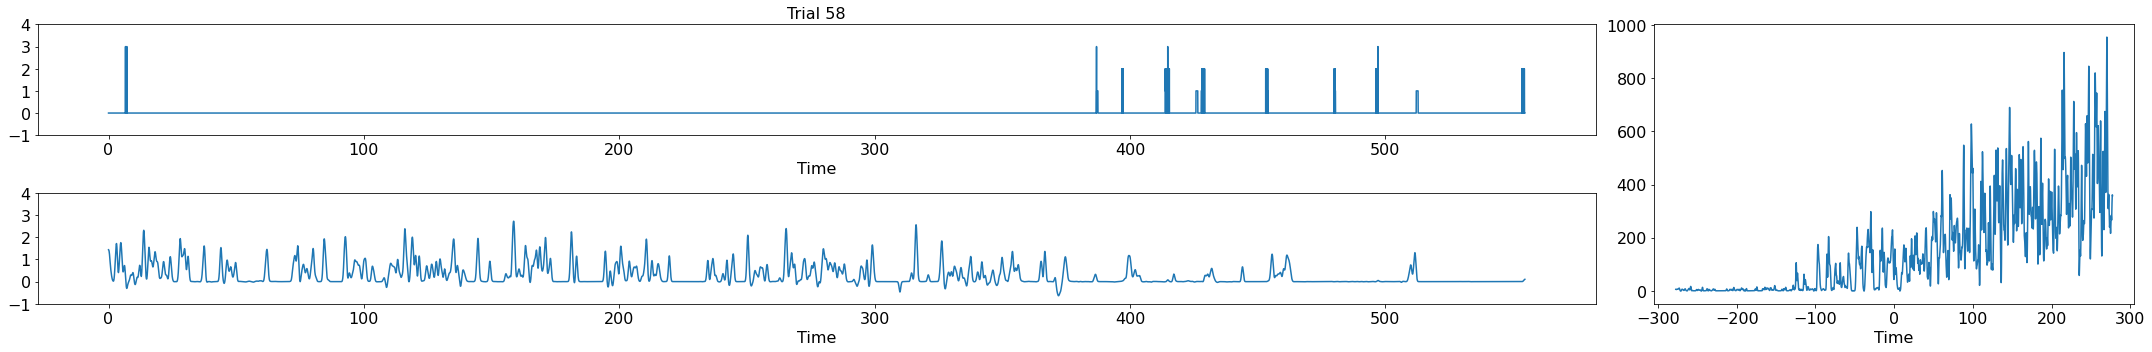

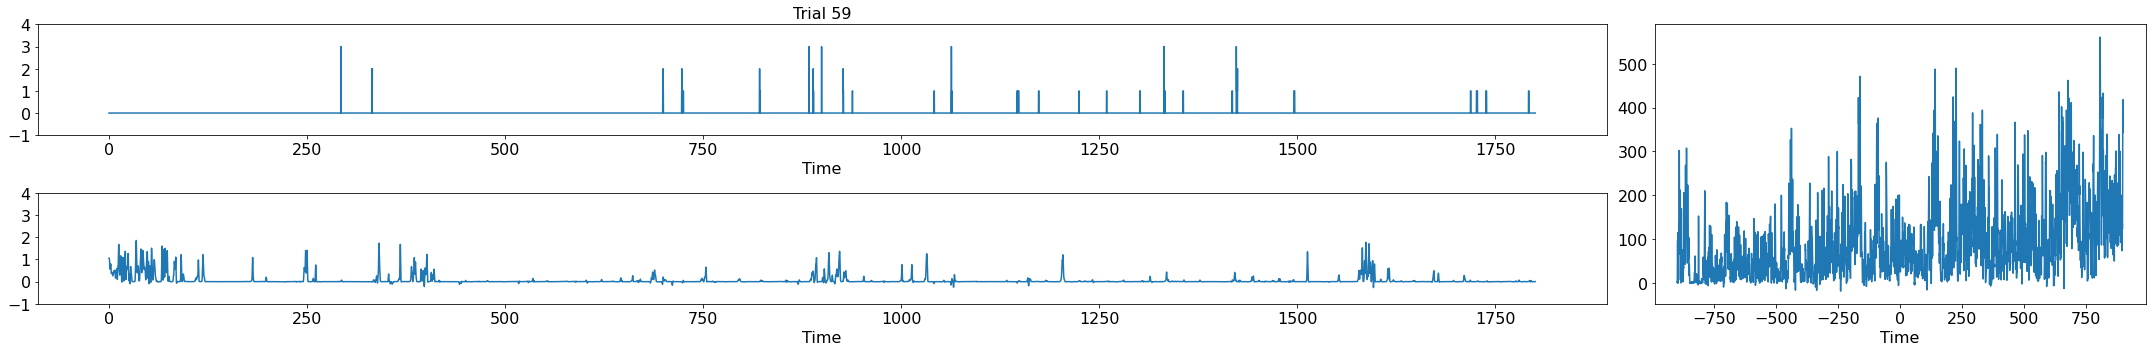

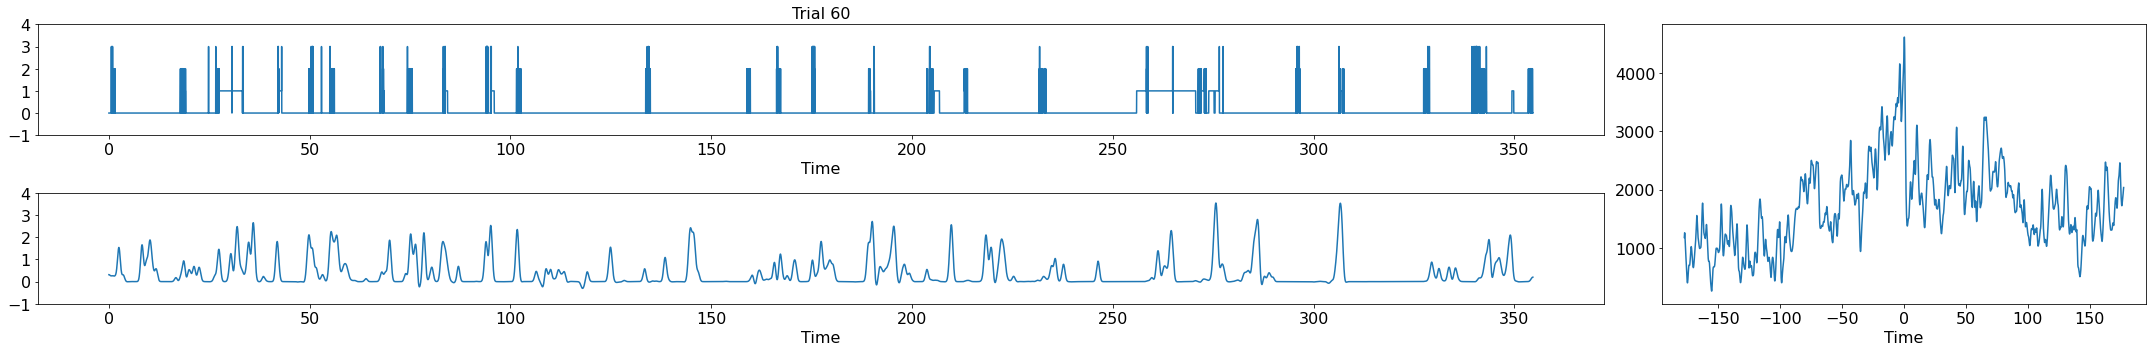

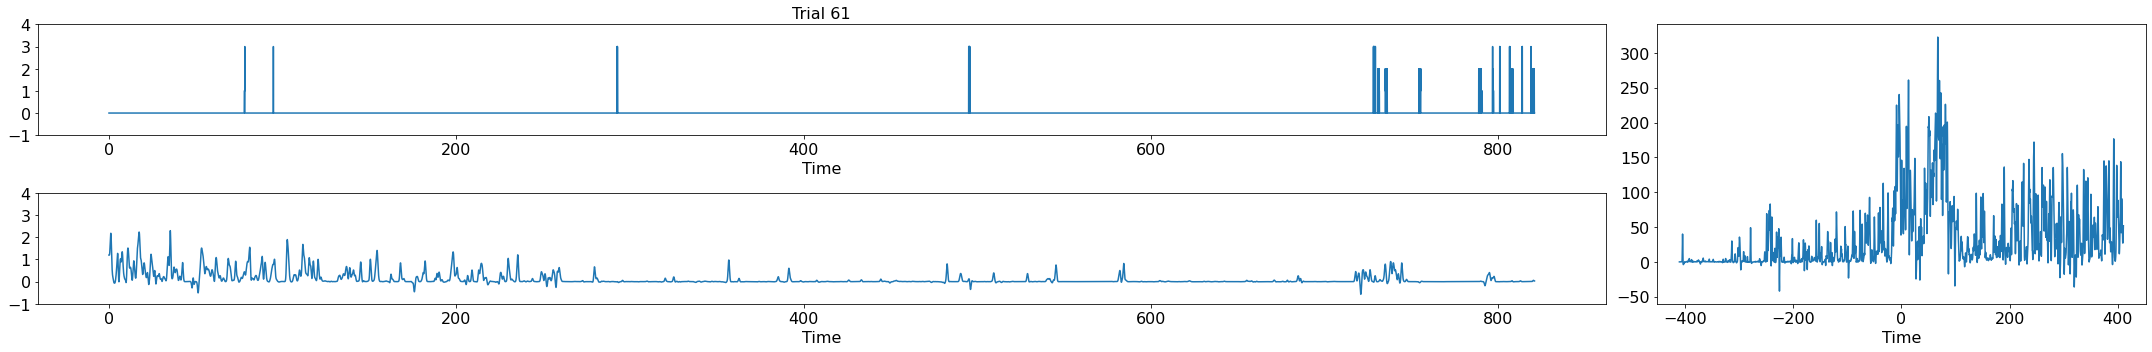

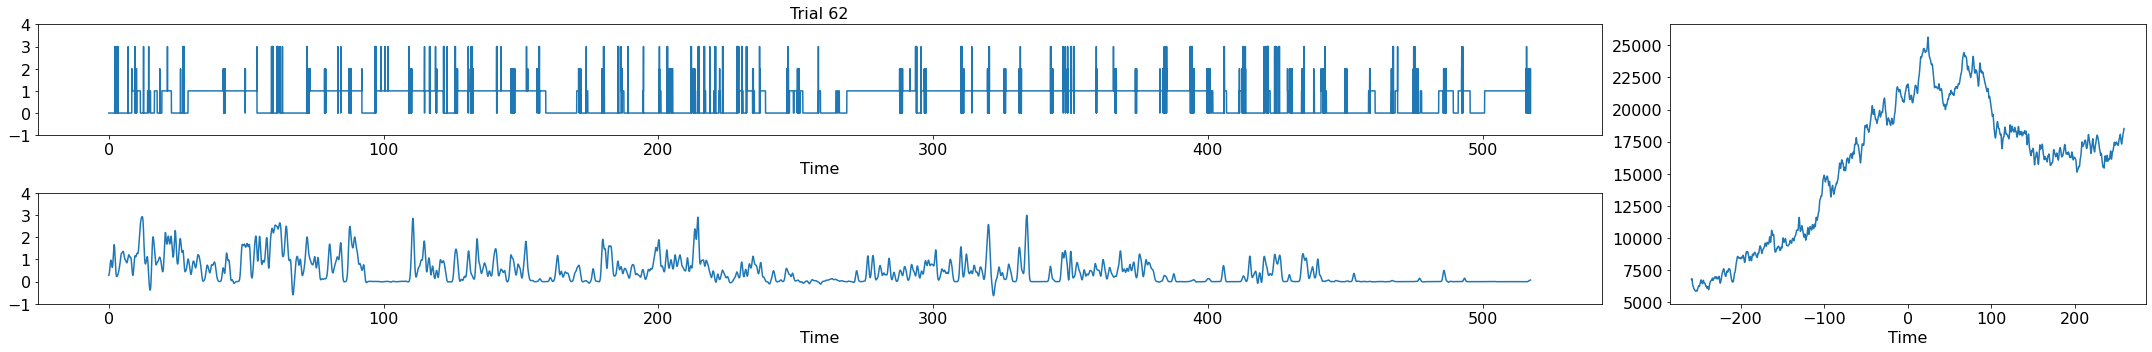

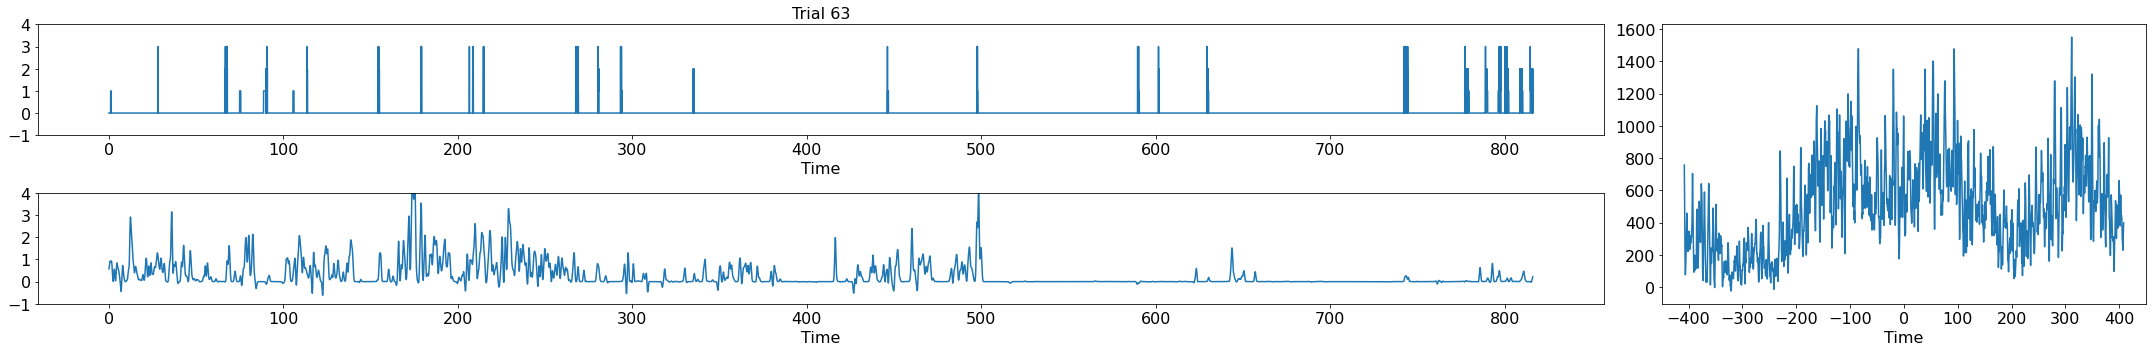

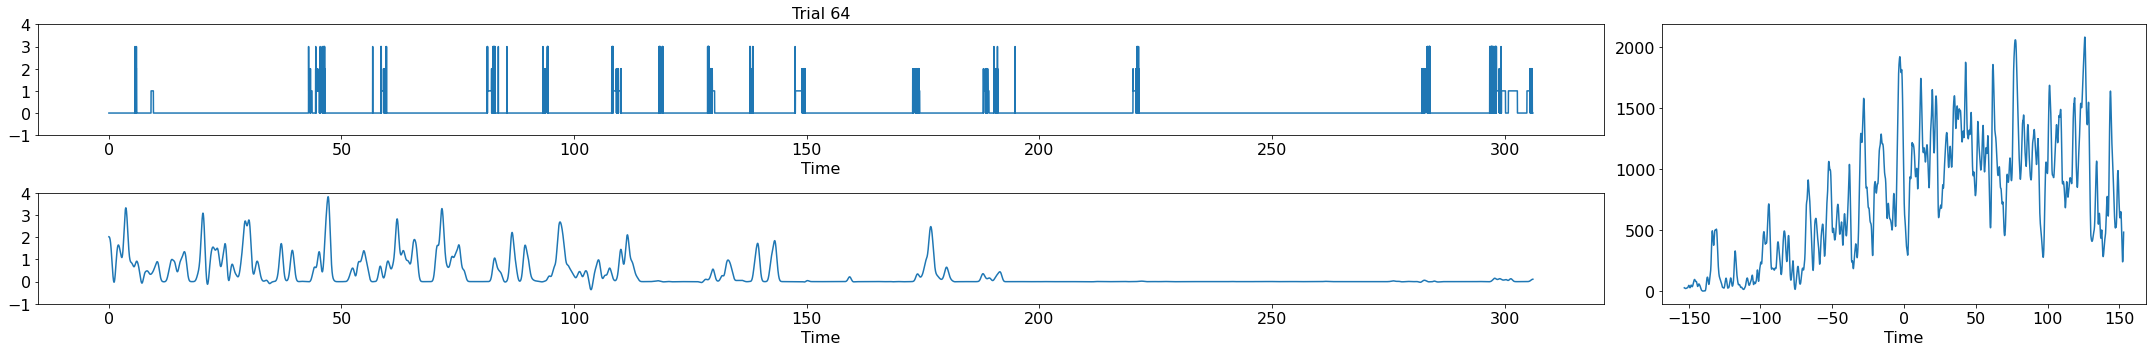

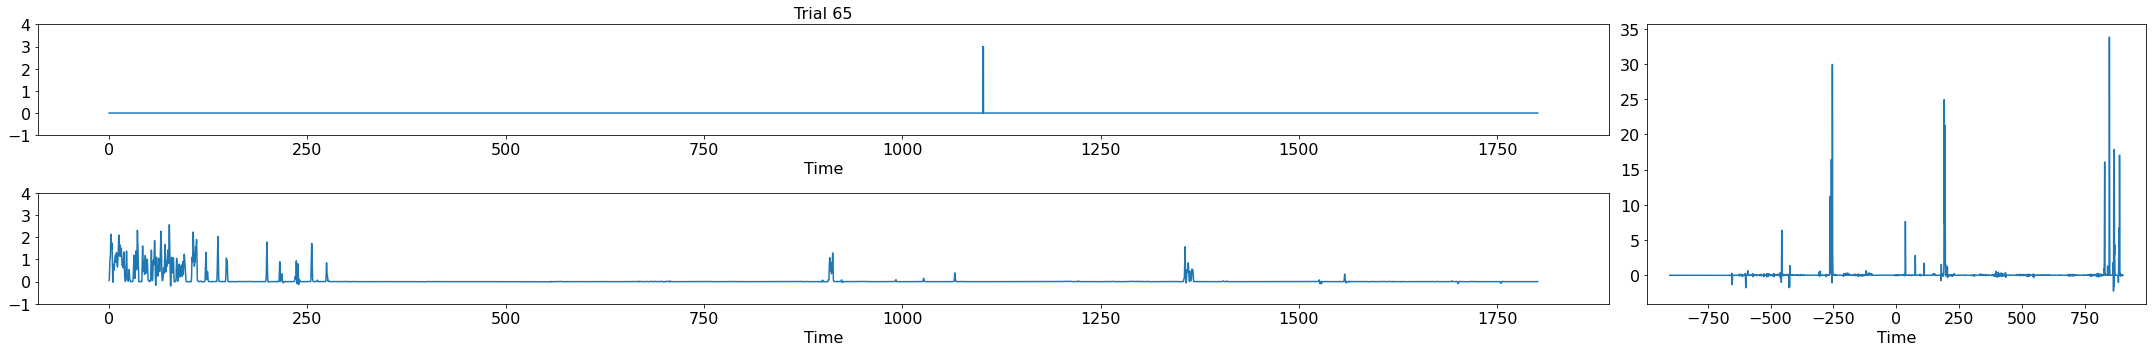

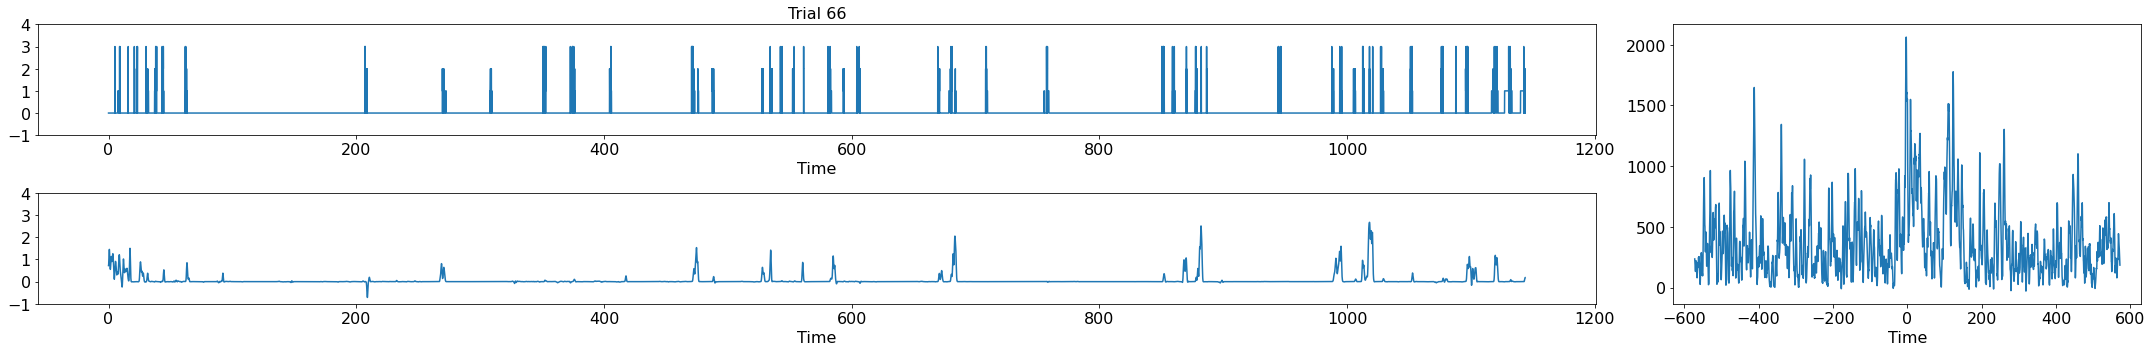

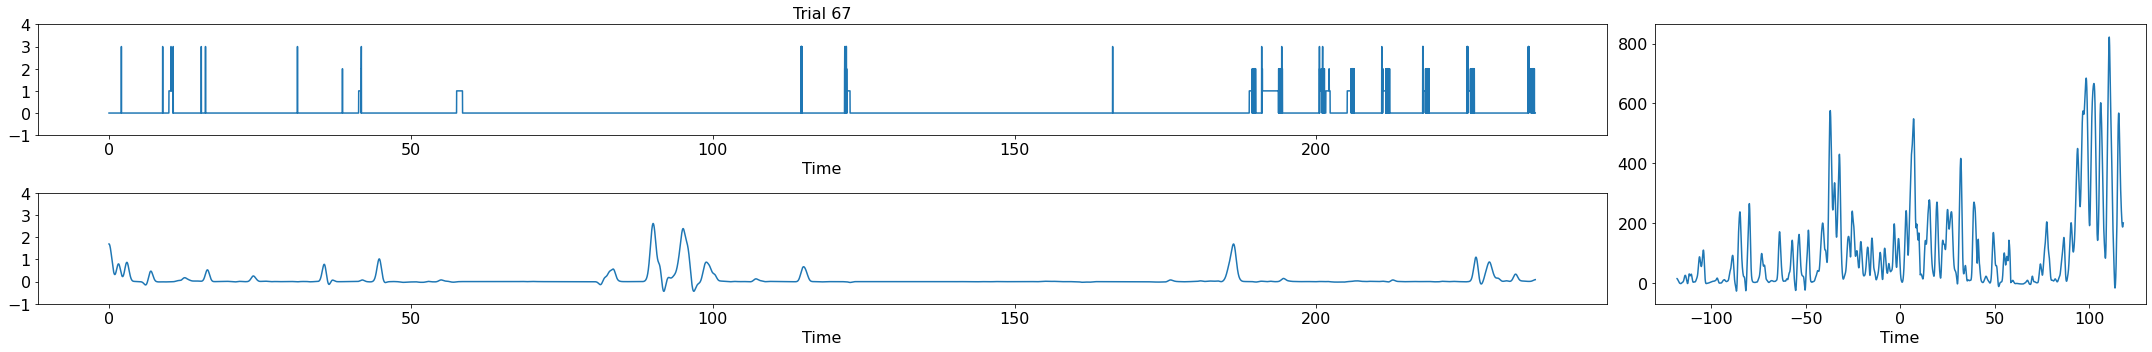

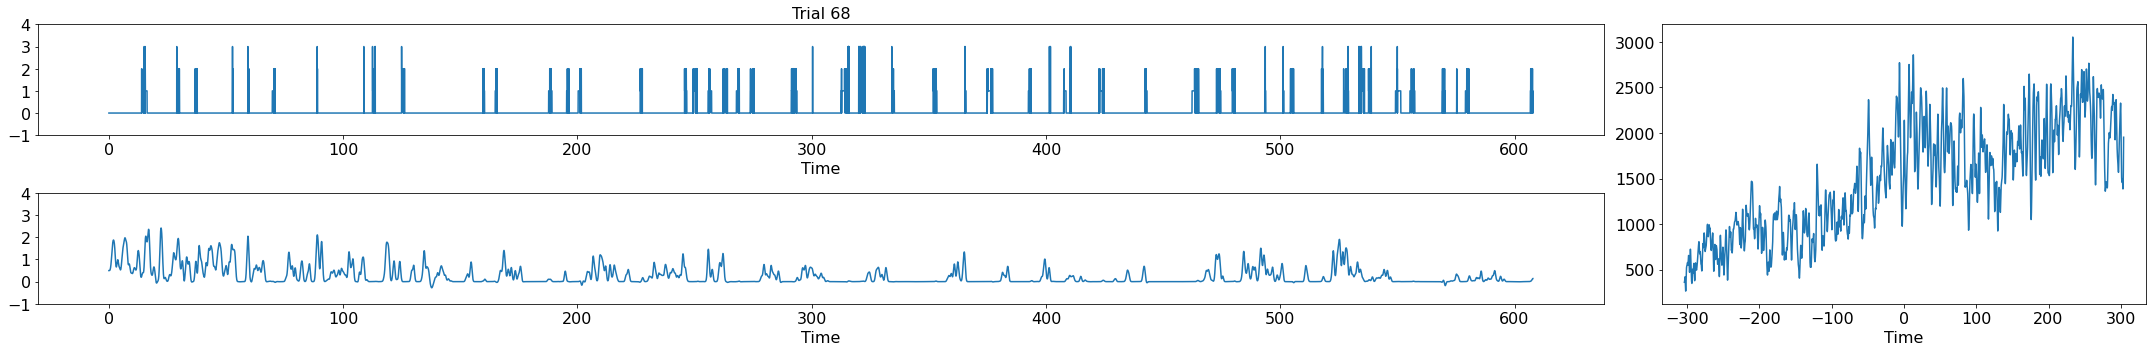

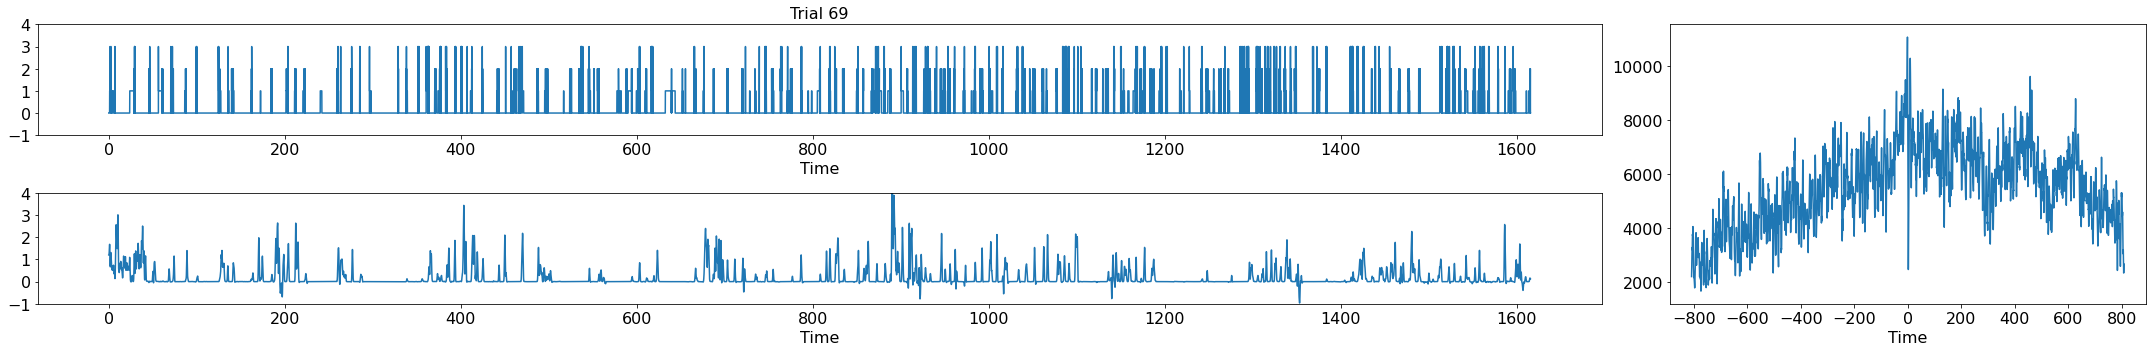

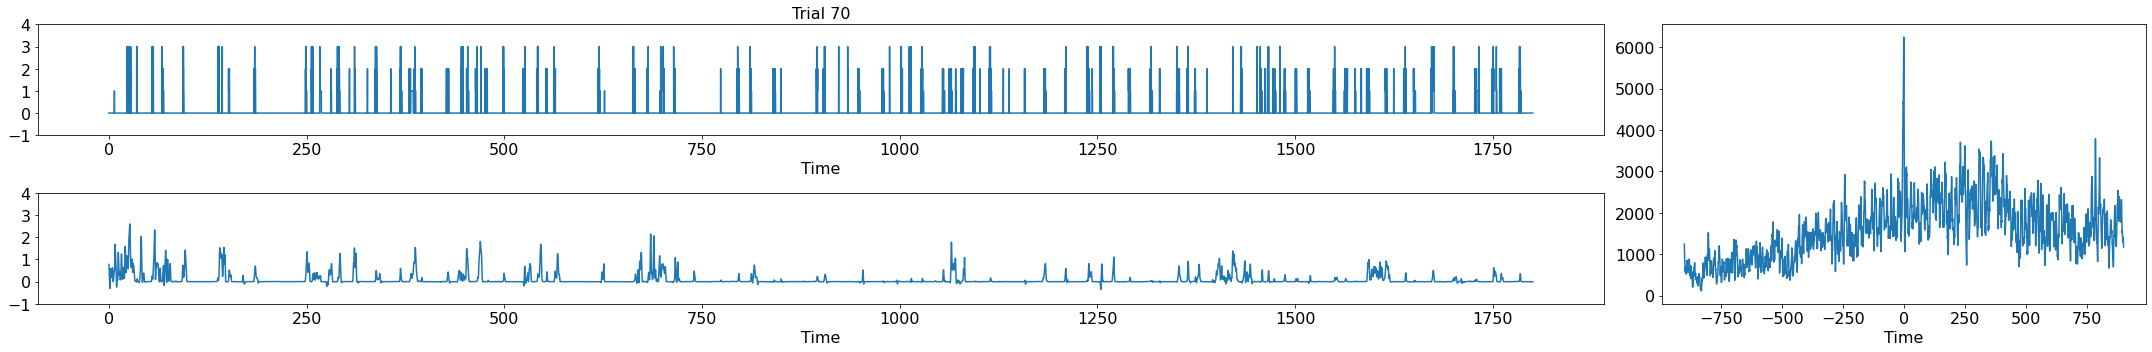

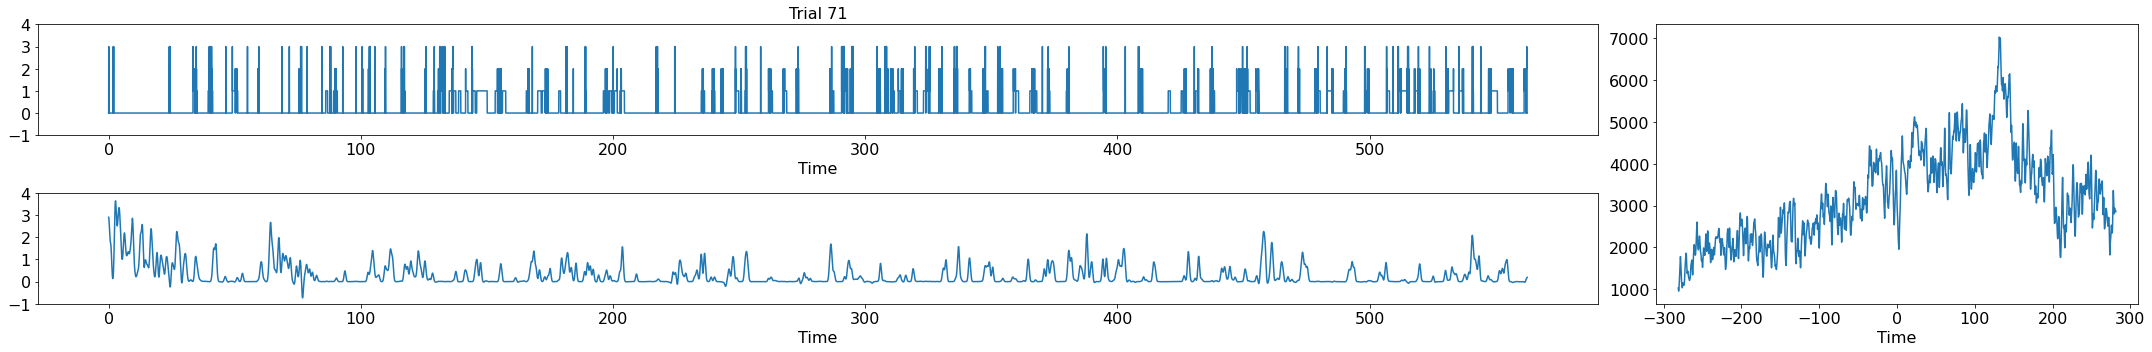

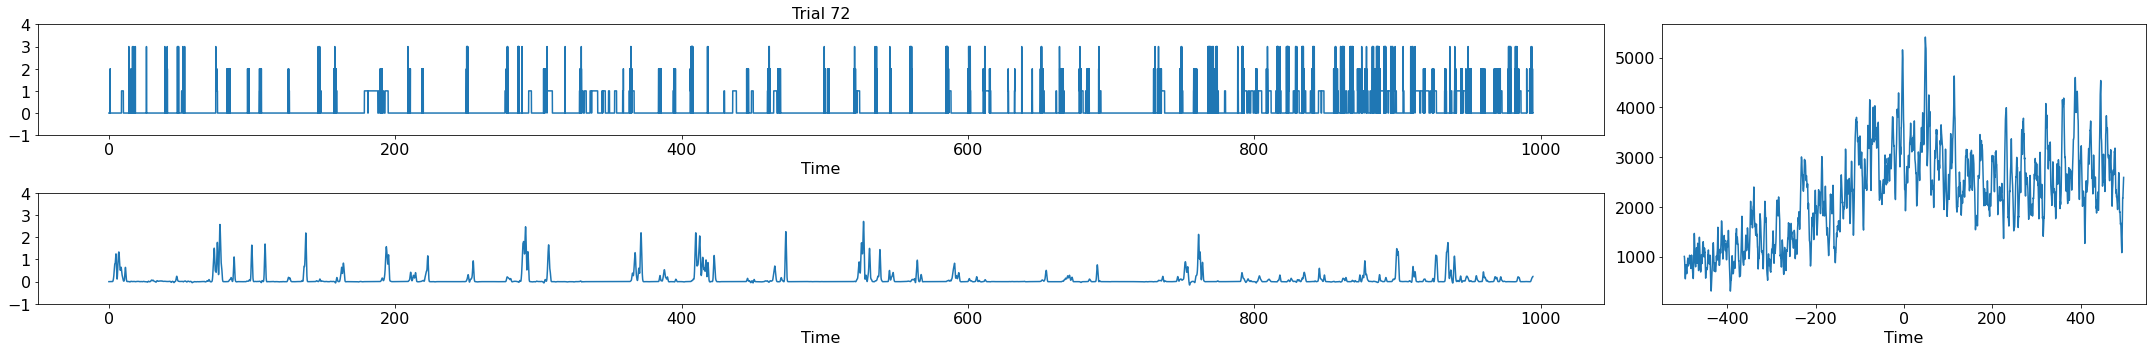

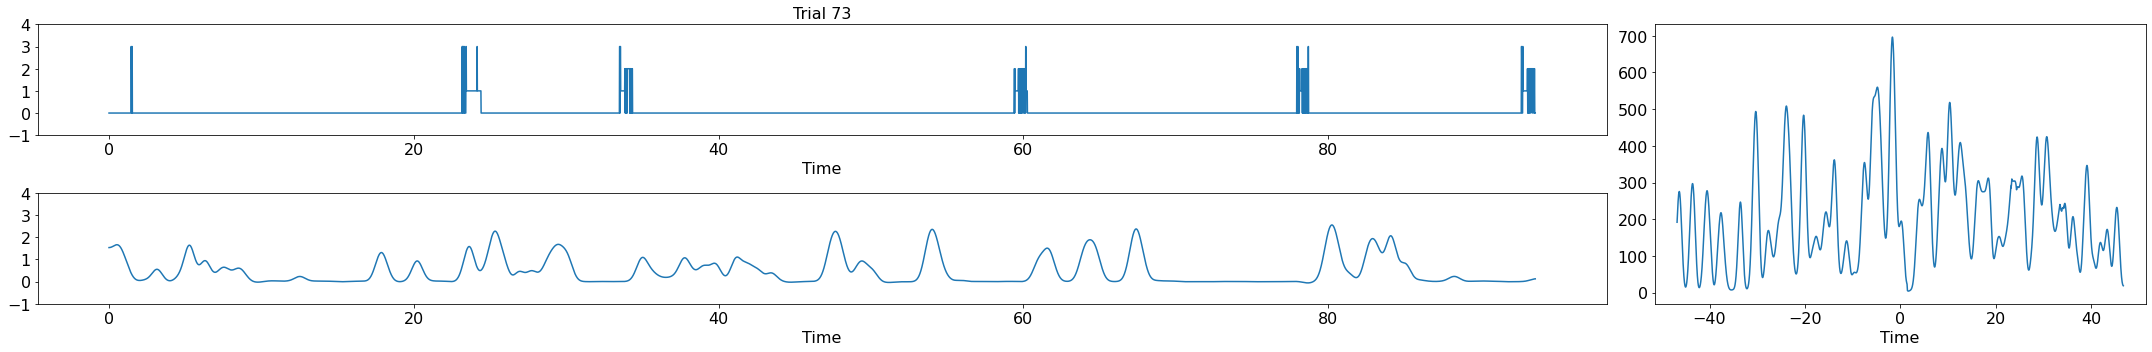

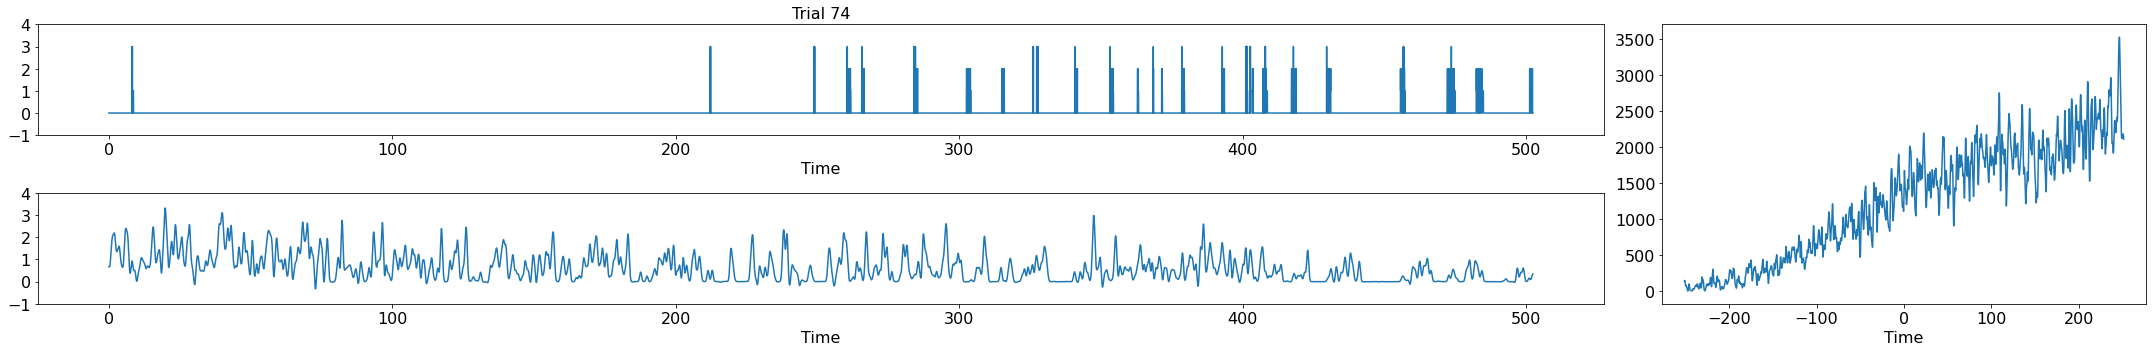

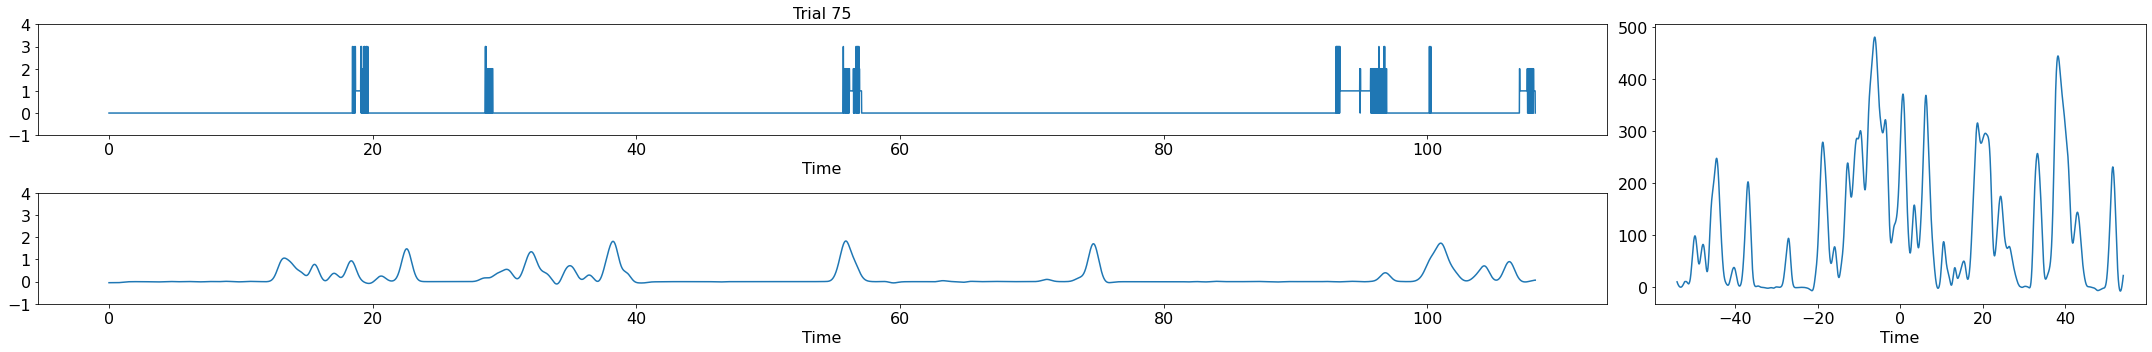

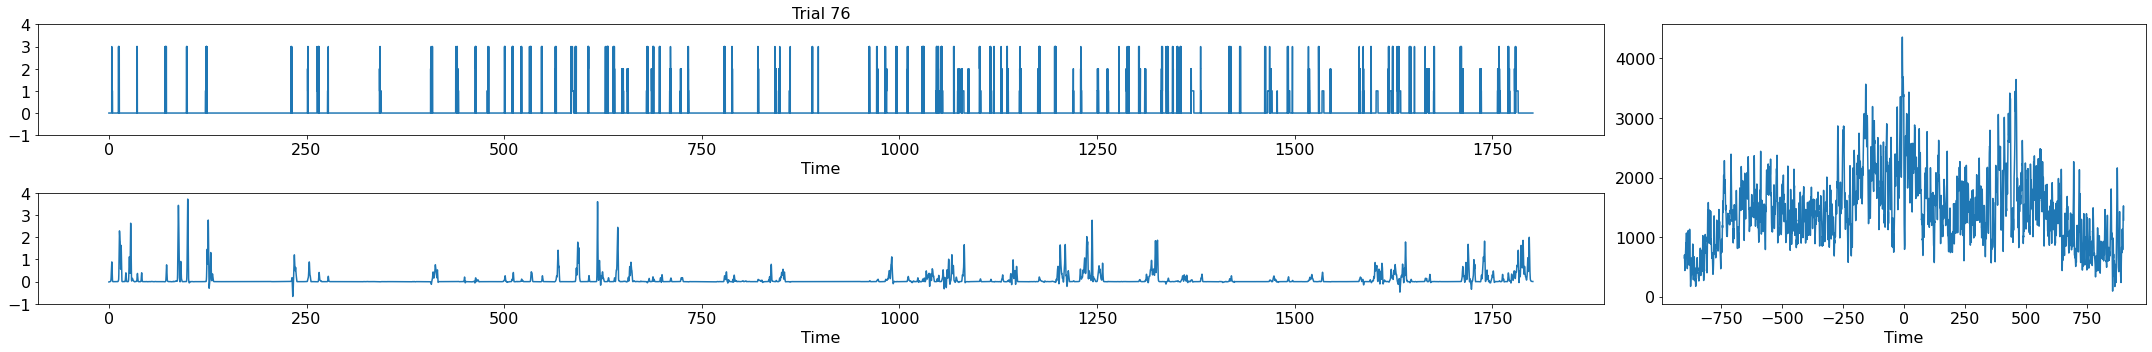

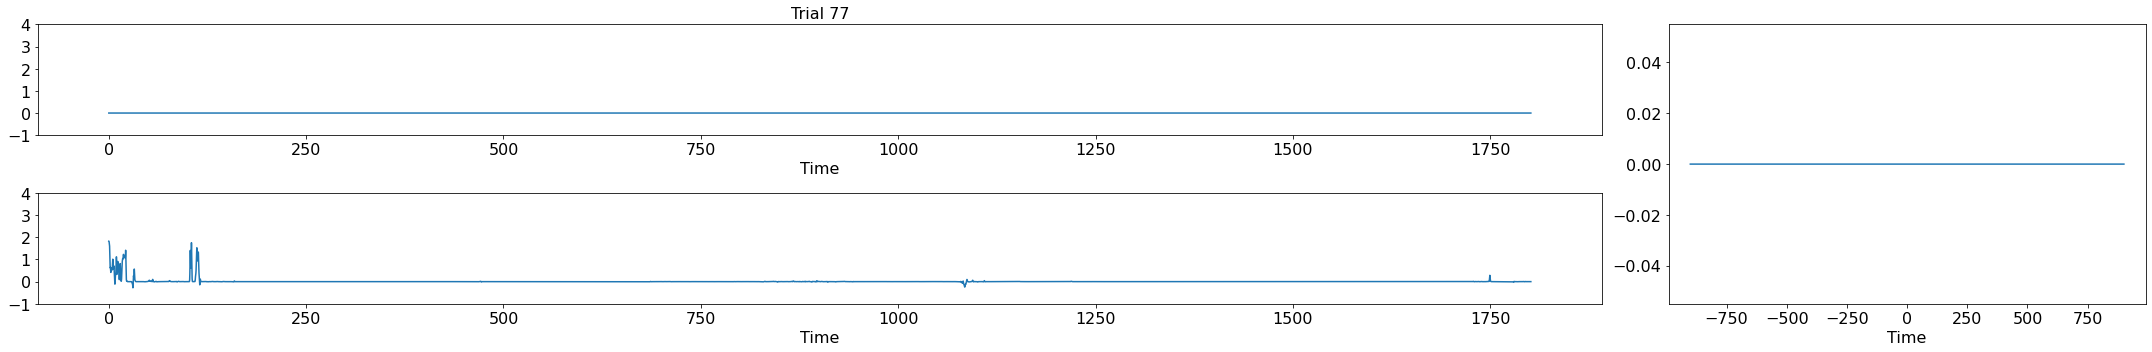

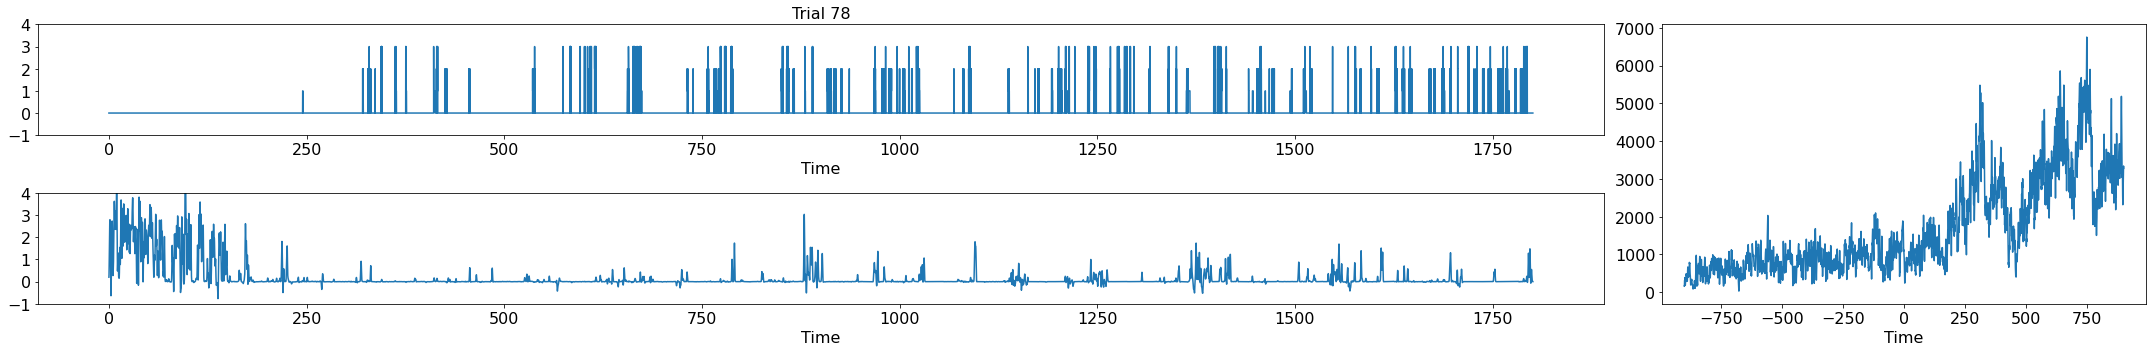

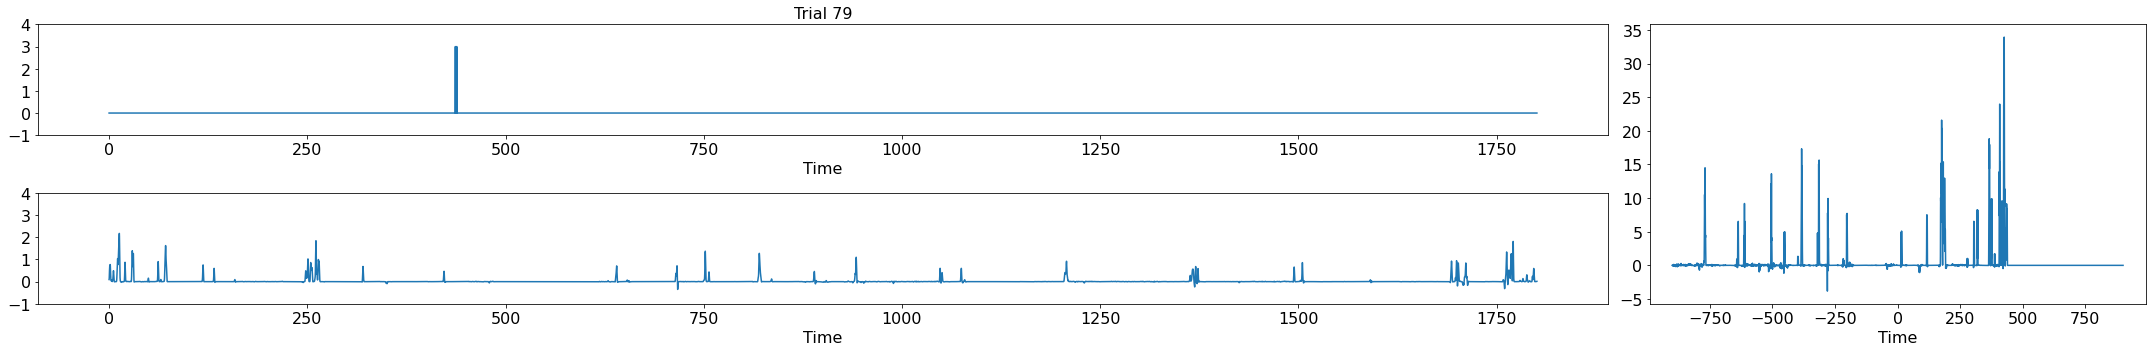

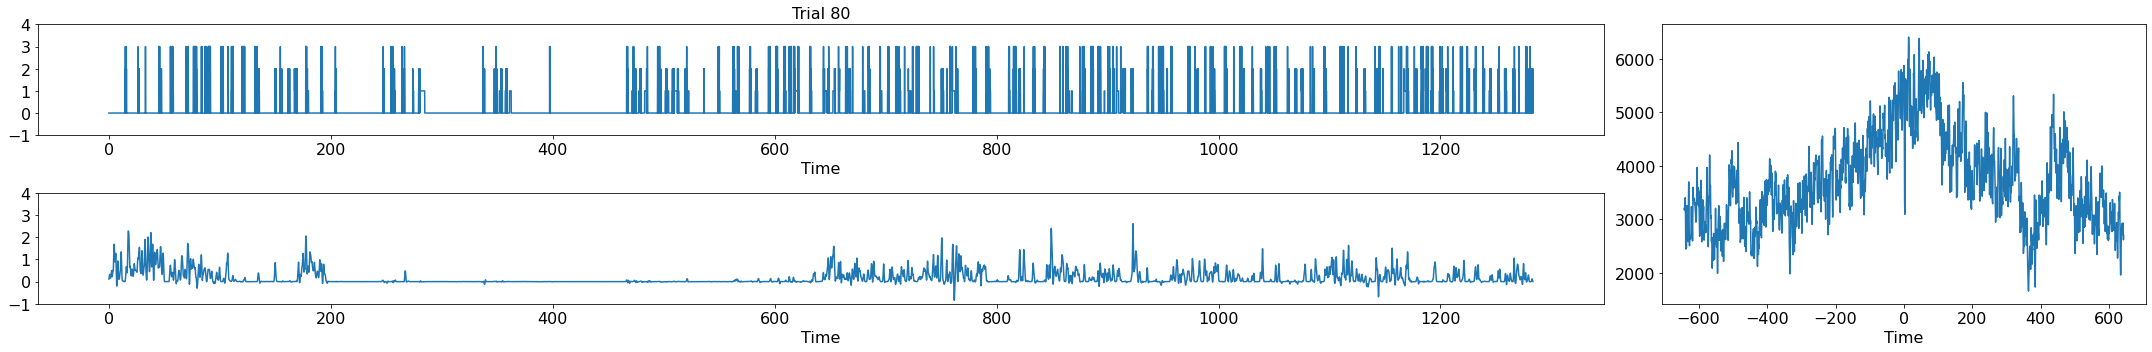

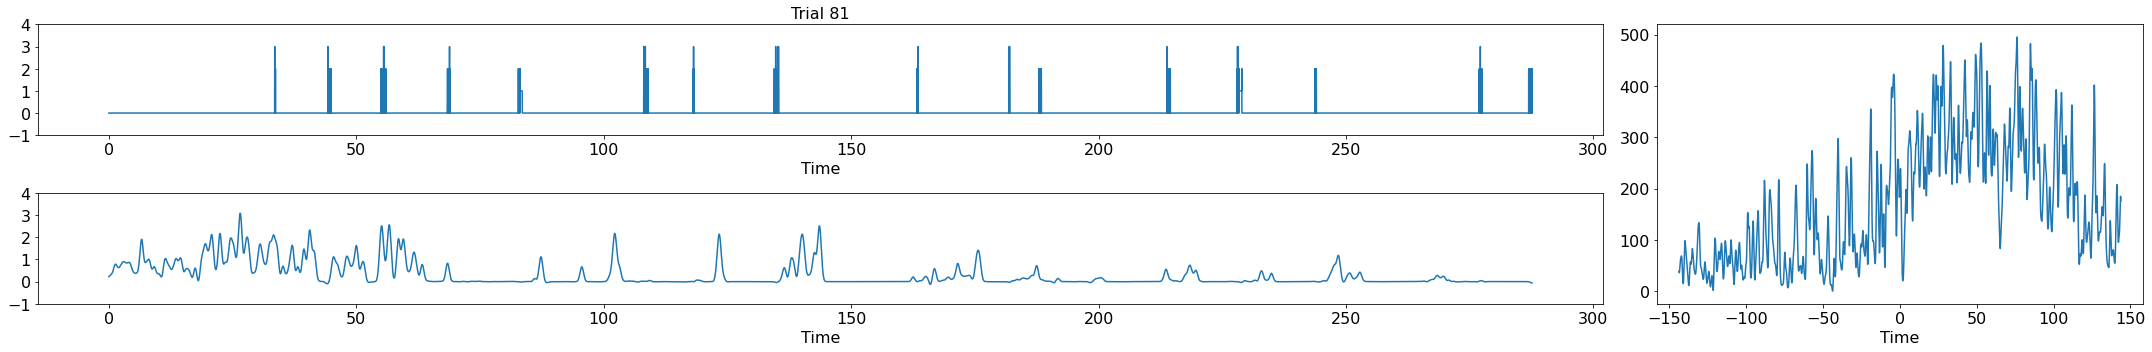

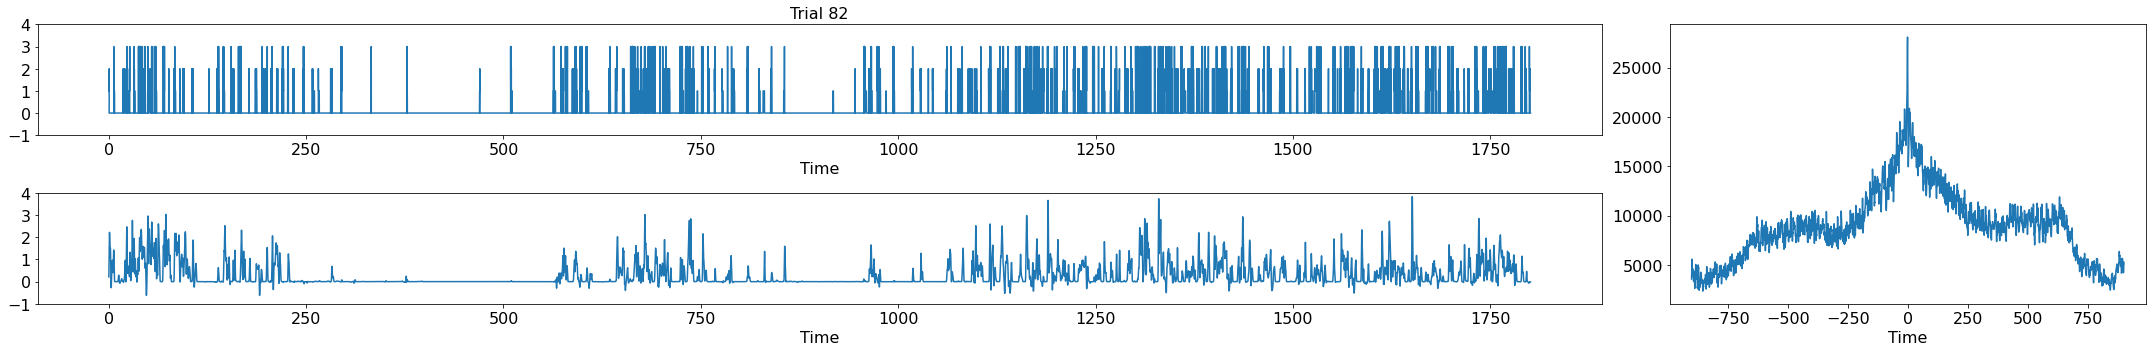

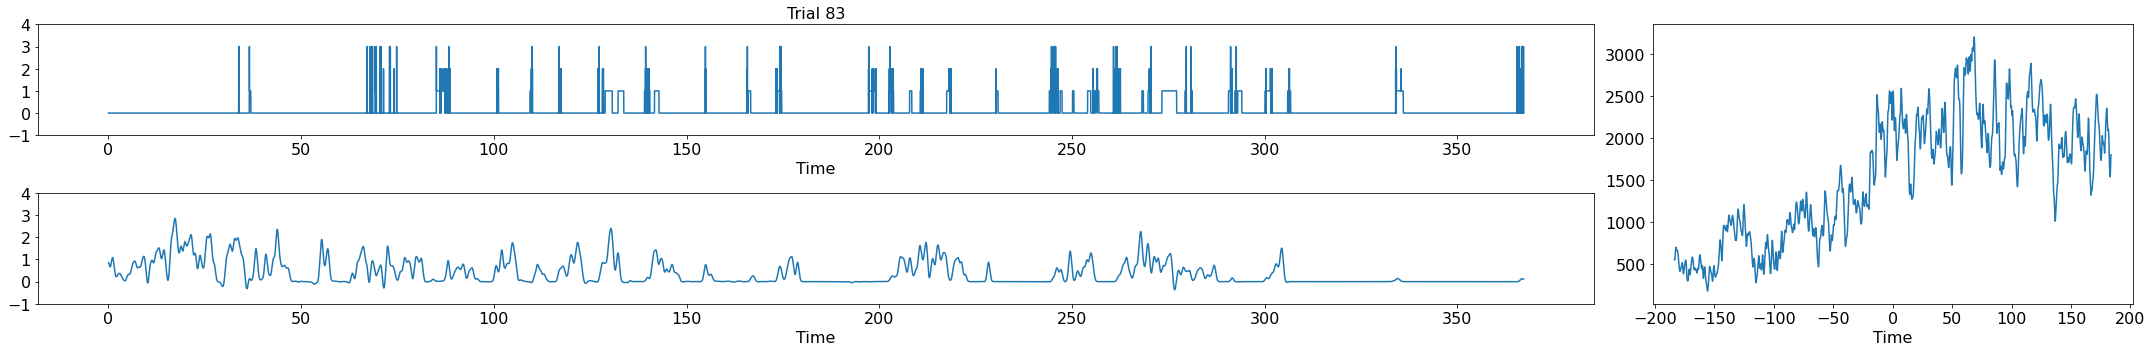

In [7]:
for PLOT_IDX in range(84):
    t = ds[PLOT_IDX]['t']
    s = ds[PLOT_IDX]['s']
#     fFV = ds[PLOT_IDX]['fFV']
    fFV = smooth(ds[PLOT_IDX]['fFV'], 50)
    
    gs = gridspec.GridSpec(2, 8)
    fig = plt.figure(figsize=(30, 5), tight_layout=True)
    axs = [
        fig.add_subplot(gs[0, :6]), fig.add_subplot(gs[1, :6]), fig.add_subplot(gs[:, 6:])
    ]
    axs[0].plot(t, s)
    axs[1].plot(t, fFV)
    axs[0].set_title(f'Trial {PLOT_IDX}')
    
    for ax in axs[:2]:
    #     set_plot(ax, x_lim=(600, 800), y_lim=(-5, 5), x_label='Time', font_size=16)
        set_plot(ax, x_label='Time', y_lim=(-1, 4), font_size=16)
        
    xcor = correlate((s > 0).astype(float), fFV, mode='same')
    tcor = (np.arange(len(xcor)) - len(xcor)/2)/FPS
    axs[2].plot(tcor, xcor)
    set_plot(axs[2], x_label='Time', font_size=16)

In [8]:
PLOT_IDX

19

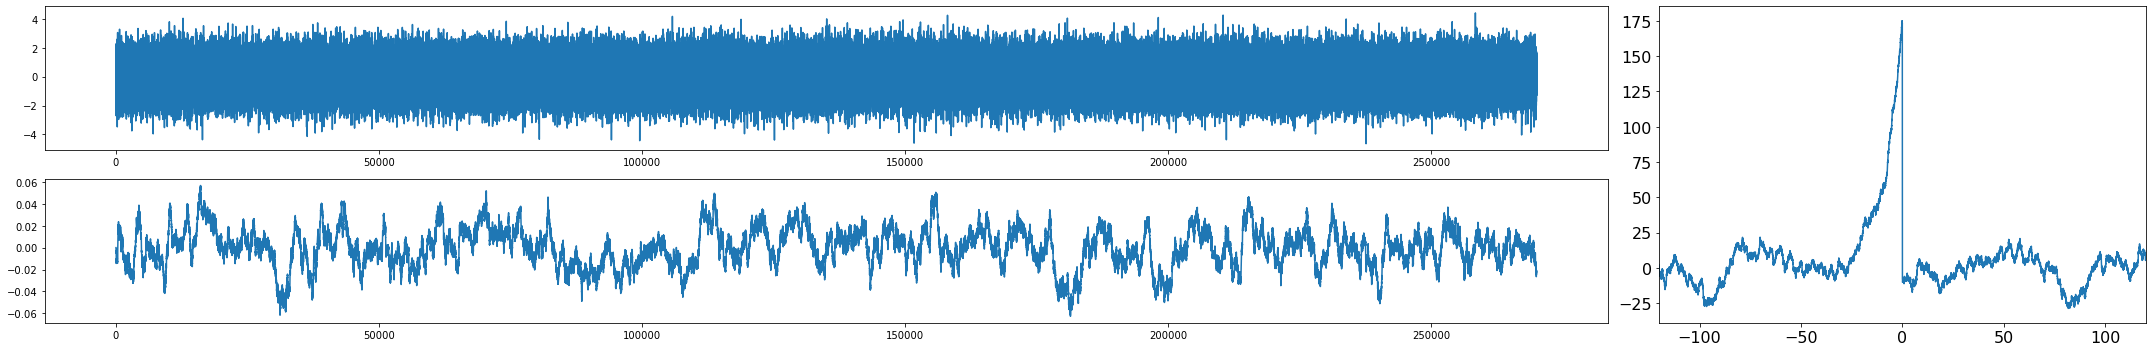

In [9]:
tau = 10*FPS
x = np.random.randn(1800*FPS)
y = np.nan*np.zeros(len(x))
y[0] = 0
for t_ in range(1, len(x)):
    dy = (1/tau)*(-y[t_-1] + x[t_])
    y[t_] = y[t_-1] + dy
    
gs = gridspec.GridSpec(2, 8)
fig = plt.figure(figsize=(30, 5), tight_layout=True)
axs = [
    fig.add_subplot(gs[0, :6]), fig.add_subplot(gs[1, :6]), fig.add_subplot(gs[:, 6:])
]

xcor = correlate(x, y, mode='same')
tcor = (np.arange(len(xcor)) - len(xcor)/2)/FPS

axs[0].plot(x)
axs[1].plot(y)
axs[2].plot(tcor, xcor)

set_plot(axs[2], x_lim=(-120, 120), font_size=16)